## **Optimizing Cost In Transport Network**

#  Dataset : Paris_Urban_Road : Weighted

##  Packages Declaration

In [5]:
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import math as m
import pandas as pd 
from collections import Counter
import seaborn as sns
from scipy.linalg import pinv
from scipy.linalg import expm  # to perform matrix exponentiation 
pic="Paris-Urban-Road-"

In [6]:
"Author : Oumarou moussa Bola"
"Last modified : 2024/10/30,CAPE TOWN "
"Year:2024"

'Year:2024'

# Dataset Initialization : useful

     source  target    weight
0         0     197   39.4541
1         1     179   41.6729
2         6     259   72.8405
3         8     166   21.3810
4        10     199   46.4351
..      ...     ...       ...
489     332     321   50.3040
490     333      70  100.5886
491     333     316   94.7273
492     334      74  128.7493
493     334     323  181.2029

[494 rows x 3 columns]


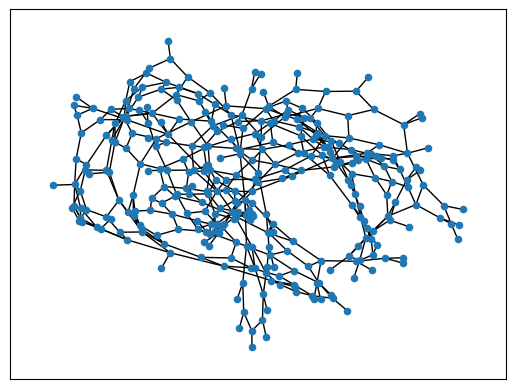

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [7]:

df = pd.read_csv('Paris_urban_road_edges.csv')  # Replace with your dataset file
print(df)
# If the CSV has source, target, and weight columns
G = nx.from_pandas_edgelist(df, 'source', 'target') #['weight']
# Extracting the adjacency matrix
pos=nx.spring_layout(G)
A = nx.to_numpy_array(G)
# Visualizing the network
nx.draw_networkx(G, with_labels=False, node_size=20,pos=pos)
plt.axis('on')
plt.savefig(f"{pic}Initial-Structure-of-The-Network.png") 
plt.show()
print(A)

# I. Network Statistics and Distribution

# Node degrees and Number of edges : useful

In [8]:
n = len(A) # nodes
e = np.ones(n)
k = A@e # degrees. @ is a simple way of doing matrix-vector/matrix vector operations
m = np.sum(k)/2 # edges
Lambda, Q = lg.eigh(A)  # eigenvalues of A in Lambda
print(Q)
print(A)
print(np.trace(A@A@A))

[[ 9.11907552e-04 -4.23795397e-04  1.38967750e-03 ...  1.34824592e-02
  -1.80513221e-05  5.92709062e-04]
 [-3.02228860e-03  1.36061666e-03 -4.43794149e-03 ...  4.69655165e-02
  -6.36615631e-05  2.18275679e-03]
 [ 2.21766045e-02 -2.02583127e-02  1.37892513e-02 ...  1.41374821e-02
  -2.22727324e-04  1.97779859e-03]
 ...
 [ 7.79806016e-03  1.16878972e-02 -1.09781170e-02 ... -4.47880316e-03
   2.38008960e-04  1.15055647e-02]
 [ 2.83358879e-04  3.78178365e-03  9.00861133e-03 ...  6.54789802e-04
   2.65627514e-02  1.37662724e-03]
 [-8.54971632e-05 -1.17792362e-03 -2.82091697e-03 ...  1.87971462e-04
   7.53190402e-03  3.73811433e-04]]
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
114.0


# Average Degree - Degree distribution

In [9]:
degrees = dict(G.degree())
avg_degree = sum(degrees.values()) / float(G.number_of_nodes())
print(avg_degree)
global_clustering=nx.transitivity(G)  # This is the global clustering coefficient
print(f"Average Degree: {avg_degree}")
print(f"Global Clustering Coefficient: {global_clustering}")

2.9492537313432834
Average Degree: 2.9492537313432834
Global Clustering Coefficient: 0.049436253252385085


# Node degree distribution and accumulated frequency:

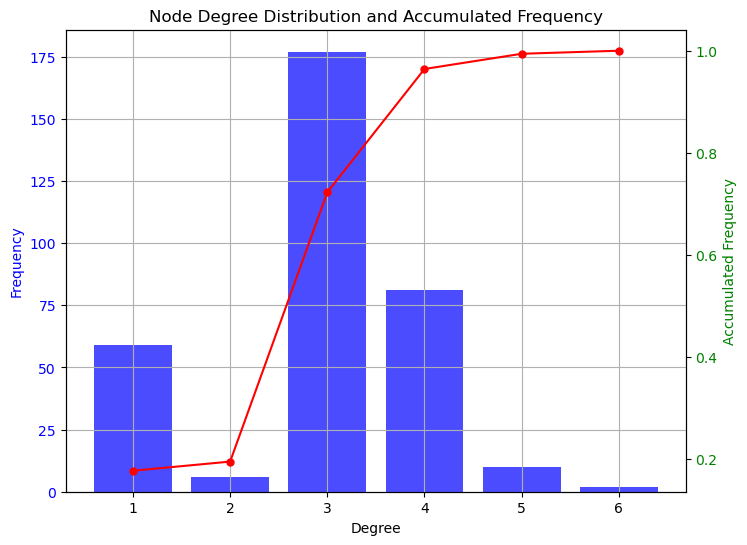

In [10]:

G = nx.from_numpy_array(A)
degrees = [G.degree(n) for n in G.nodes()]

degree_values, degree_counts = np.unique(degrees, return_counts=True)
accumulated_freq = np.cumsum(degree_counts) / sum(degree_counts)

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(degree_values, degree_counts, color='b', alpha=0.7, label="Degree Frequency", width=0.8)

ax1.set_xlabel("Degree")
ax1.set_ylabel("Frequency", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

ax2.plot(degree_values, accumulated_freq, 'ro-', label="Accumulated Frequency", markersize=5)

ax2.set_ylabel("Accumulated Frequency", color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax1.grid(True)

plt.title("Node Degree Distribution and Accumulated Frequency")
plt.savefig(f'{pic}Node_Degree_distribution_And_accumulated_degree_distribution.png')
plt.show()


# Degree Distribution Of my Network : Useful

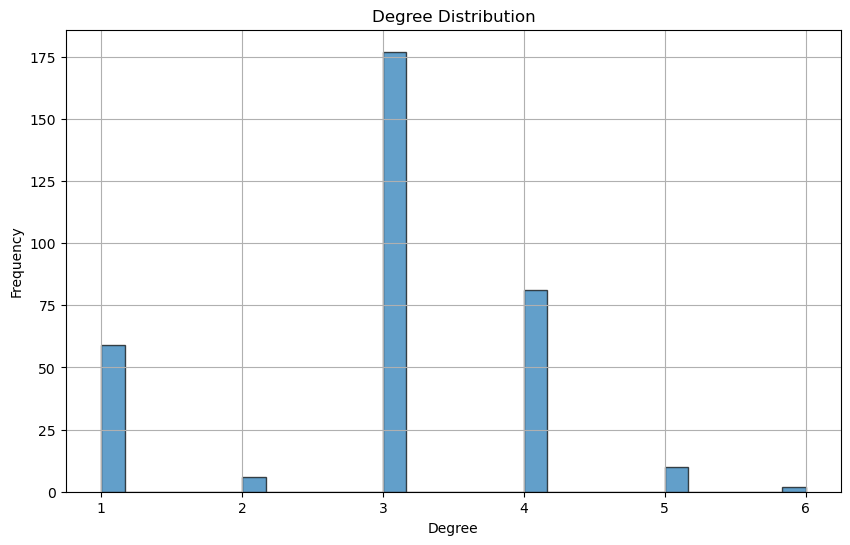

In [11]:
# to Compute and plot degree distribution using NetworkX
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # the nodes degree sequence
plt.figure(figsize=(10,6))
plt.hist(degree_sequence, bins=30, edgecolor='black', alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig(f"{pic}Degree-Distribution.png")
plt.show()

# Top Nodes with High degrees in the network

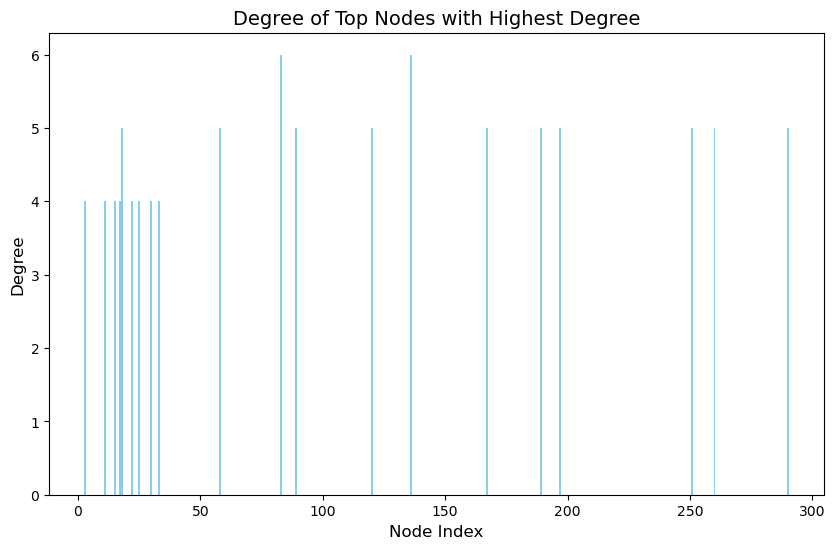

In [12]:
def plot_top_node_degree_histogram(G):
    degree_dict = dict(G.degree())
    top_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)[:20]
    top_node_degrees = [degree_dict[node] for node in top_nodes]
    plt.figure(figsize=(10,6))
    plt.bar(top_nodes, top_node_degrees, color='skyblue')
    plt.xlabel('Node Index', fontsize=12)
    plt.ylabel('Degree', fontsize=12)
    plt.title('Degree of Top Nodes with Highest Degree', fontsize=14)
    plt.savefig(f"{pic}Top-nodes-with-highest-degree.png")
    plt.show()    
plot_top_node_degree_histogram(G)

# II.1. Measures of Network distances and Visualisation

# COMPUTE LAPLACIAN MATRIX : USEFUL 

In [13]:
print(f"The number of nodes is :{n}")
print(f"The number of edges is :{m}")
# print(f"The node degrees matrix \nk={k}")
#-------------------Laplacian Matrix----------------------------------
len(A)
KK=np.zeros((len(A),len(A)))
for i in range(len(A)):
    KK[i,i]=k[i]
print(KK) ## KK is a diagonal matrix of the nodes degree 
L=KK-A
print(f"The Laplacien Matrix of the network is \n :{L}")
#-------------------Laplacian Matrix----------------------------------


The number of nodes is :335
The number of edges is :494.0
[[1. 0. 0. ... 0. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
The Laplacien Matrix of the network is 
 :[[ 1. -1.  0. ...  0.  0.  0.]
 [-1.  3.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  3.  0.  0.]
 [ 0.  0.  0. ...  0.  3. -1.]
 [ 0.  0.  0. ...  0. -1.  1.]]


# COMPUTE : RESISTANCE DISTANCE

In [14]:
L_pinv= pinv(L) # To compute the pseudo_inverse of the Laplacian matrix
# print(L_pinv)
R=np.zeros((len(L),len(L)))
for i in range(len(L)):
    for j in range(len(L)):
        R[i,j]=L_pinv[i,i]+L_pinv[j,j]-2*L_pinv[i,j]
print(R)

[[0.         1.         5.49623906 ... 4.93213264 5.16868908 6.16868908]
 [1.         0.         4.49623906 ... 3.93213264 4.16868908 5.16868908]
 [5.49623906 4.49623906 0.         ... 3.56641471 4.1439175  5.1439175 ]
 ...
 [4.93213264 3.93213264 3.56641471 ... 0.         2.68211669 3.68211669]
 [5.16868908 4.16868908 4.1439175  ... 2.68211669 0.         1.        ]
 [6.16868908 5.16868908 5.1439175  ... 3.68211669 1.         0.        ]]


# COMPUTE : CHEBOTAREV-SHAMIS-METRIC

In [15]:
#let's define alpha
alpha=2500 
I=np.eye(len(L))
print(I)
#Let's define Q=(I-alpha*L)^-1
Q=lg.inv(I-alpha*L)
print(Q)
CS=np.zeros((len(Q),len(Q)))
for i in range(len(Q)):
    for j in range(len(Q)):
        CS[i,j]=0.5*(Q[i,i]+Q[j,j]-Q[i,j]-Q[j,i])
print(f"The chebotarev-shamis metric is given by\n:{CS}")

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0.00156887 0.00196825 0.00291338 ... 0.00305234 0.00305107 0.00305229]
 [0.00196825 0.00196746 0.00291222 ... 0.00305112 0.00304985 0.00305107]
 [0.00291338 0.00291222 0.00205108 ... 0.00301811 0.0030874  0.00308864]
 ...
 [0.00305234 0.00305112 0.00301811 ... 0.00255074 0.00304122 0.00304243]
 [0.00305107 0.00304985 0.0030874  ... 0.00304122 0.00245131 0.00245229]
 [0.00305229 0.00305107 0.00308864 ... 0.00304243 0.00245229 0.00205311]]
The chebotarev-shamis metric is given by
:[[ 0.         -0.00020008 -0.00110341 ... -0.00099254 -0.00104098
  -0.0012413 ]
 [-0.00020008  0.         -0.00090295 ... -0.00079202 -0.00084047
  -0.00104079]
 [-0.00110341 -0.00090295  0.         ... -0.0007172  -0.00083621
  -0.00103654]
 ...
 [-0.00099254 -0.00079202 -0.0007172  ...  0.         -0.00054019
  -0.00074051]
 [-0.00104098 -0.00084047 -0.

# Scaled Metric :

In [16]:
def scaled_metric(M):
    M_min = np.min(M)
    M_max = np.max(M)
    M_scaled = (M - M_min) / (M_max - M_min)
    return M_scaled

CS_scaled=scaled_metric(CS) # scaled Chebotarev-SHamis metric 
R_scaled=scaled_metric(R) # Scaled resistance  Metric
print("THe scaled Chebotarev-SHamis-Metric is \n\n: ")
print(CS_scaled)
print("THe scaled Resistance DIstance Metric is \n\n : ")
print(R_scaled)

THe scaled Chebotarev-SHamis-Metric is 

: 
[[1.         0.90025651 0.44993138 ... 0.5052025  0.48105298 0.38118987]
 [0.90025651 1.         0.54986334 ... 0.60516217 0.58101239 0.48114952]
 [0.44993138 0.54986334 1.         ... 0.64246403 0.58313411 0.48326375]
 ...
 [0.5052025  0.60516217 0.64246403 ... 1.         0.7307039  0.63084275]
 [0.48105298 0.58101239 0.58313411 ... 0.7307039  1.         0.90025653]
 [0.38118987 0.48114952 0.48326375 ... 0.63084275 0.90025653 1.        ]]
THe scaled Resistance DIstance Metric is 

 : 
[[0.         0.10109269 0.55562959 ... 0.49860255 0.52251668 0.62360937]
 [0.10109269 0.         0.4545369  ... 0.39750986 0.42142399 0.52251668]
 [0.55562959 0.4545369  0.         ... 0.36053845 0.41891976 0.52001245]
 ...
 [0.49860255 0.39750986 0.36053845 ... 0.         0.27114239 0.37223508]
 [0.52251668 0.42142399 0.41891976 ... 0.27114239 0.         0.10109269]
 [0.62360937 0.52251668 0.52001245 ... 0.37223508 0.10109269 0.        ]]


# Heatmap : Resistance Distance Metric

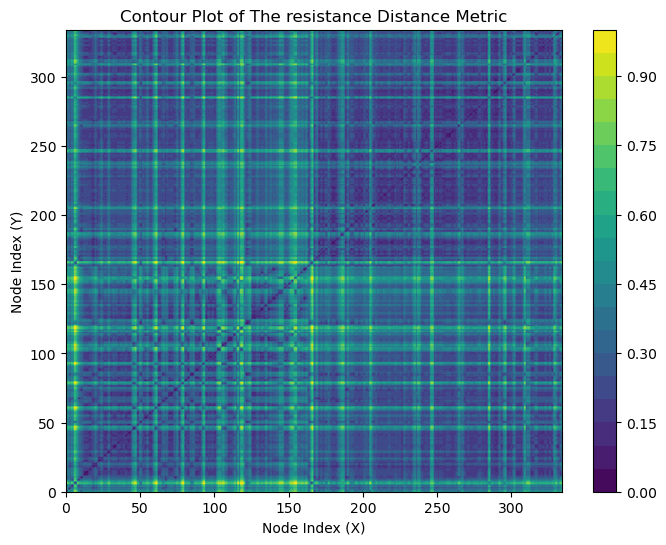

In [17]:
x = np.arange(R_scaled.shape[0])
y = np.arange(R_scaled.shape[1])
X, Y = np.meshgrid(x, y)
# Creating the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, R_scaled, levels=20, cmap='viridis')  # 20 levels, we might adjust as needed
plt.colorbar(contour)  # Adding a colorbar to show the scale
# Setting labels and title
plt.title('Contour Plot of The resistance Distance Metric')
plt.xlabel('Node Index (X)')
plt.ylabel('Node Index (Y)')
plt.savefig(f"{pic}resistance-distance-heatmap.png")
plt.show()

# Heatmap : Chebotarev-Shamis Metric 

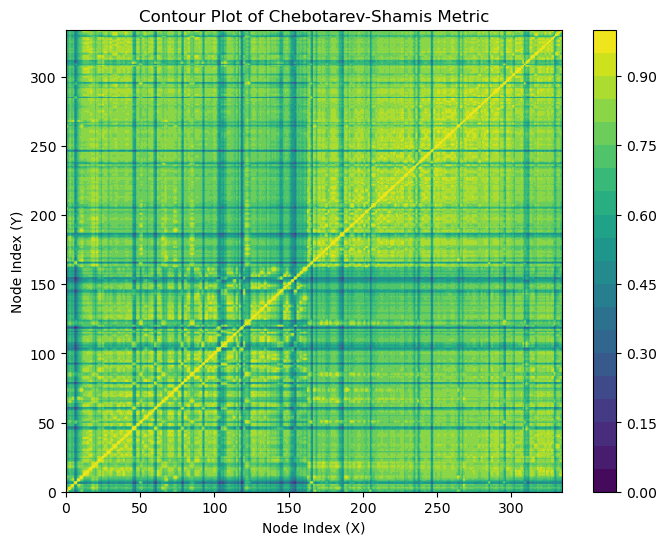

In [18]:
x = np.arange(CS_scaled.shape[0])
y = np.arange(CS_scaled.shape[1])
X, Y = np.meshgrid(x, y)
# Creating the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, CS_scaled, levels=20, cmap='viridis')  # 20 levels, we might adjust as needed
plt.colorbar(contour)  # Adding a colorbar to show the scale
# Setting the labels and title
plt.title('Contour Plot of Chebotarev-Shamis Metric')
plt.xlabel('Node Index (X)')
plt.ylabel('Node Index (Y)')
plt.savefig(f"{pic}Chebotarev-metric-heatmap.png")
plt.show()

In [20]:
# len(D_sp)
# print(D_sp[0,:])
# D_co2=A

# III. Communicability Distance Metric

In [21]:
B=sp.linalg.expm(A)#computing the communicability Matrix Function
print(B)
print(np.shape(B))

[[1.64164472e+00 1.60280913e+00 3.21617714e-05 ... 2.78073999e-14
  1.56032411e-12 9.29080228e-14]
 [1.60280913e+00 3.03844451e+00 2.74055339e-04 ... 5.03441970e-13
  2.47410390e-11 1.56032411e-12]
 [3.21617714e-05 2.74055339e-04 1.70117238e+00 ... 4.48476135e-10
  1.69451748e-14 9.02683421e-16]
 ...
 [2.78073999e-14 5.03441970e-13 4.48476135e-10 ... 3.79025623e+00
  3.59599805e-09 2.62521952e-10]
 [1.56032411e-12 2.47410390e-11 1.69451748e-14 ... 3.59599805e-09
  3.15294214e+00 1.62381092e+00]
 [9.29080228e-14 1.56032411e-12 9.02683421e-16 ... 2.62521952e-10
  1.62381092e+00 1.64495438e+00]]
(335, 335)


[[0.         1.47447097 3.34275278 ... 5.43190095 4.79458687 3.28659911]
 [1.47447097 0.         4.73906878 ... 6.82870074 6.19138665 4.68339889]
 [3.34275278 4.73906878 0.         ... 5.49142861 4.85411452 3.34612676]
 ...
 [5.43190095 6.82870074 5.49142861 ... 0.         6.94319837 5.43521061]
 [4.79458687 6.19138665 4.85411452 ... 6.94319837 0.         1.55027469]
 [3.28659911 4.68339889 3.34612676 ... 5.43521061 1.55027469 0.        ]]
[[1.64164472e+00 1.60280913e+00 3.21617714e-05 ... 2.78073999e-14
  1.56032411e-12 9.29080228e-14]
 [1.60280913e+00 3.03844451e+00 2.74055339e-04 ... 5.03441970e-13
  2.47410390e-11 1.56032411e-12]
 [3.21617714e-05 2.74055339e-04 1.70117238e+00 ... 4.48476135e-10
  1.69451748e-14 9.02683421e-16]
 ...
 [2.78073999e-14 5.03441970e-13 4.48476135e-10 ... 3.79025623e+00
  3.59599805e-09 2.62521952e-10]
 [1.56032411e-12 2.47410390e-11 1.69451748e-14 ... 3.59599805e-09
  3.15294214e+00 1.62381092e+00]
 [9.29080228e-14 1.56032411e-12 9.02683421e-16 ... 2.625

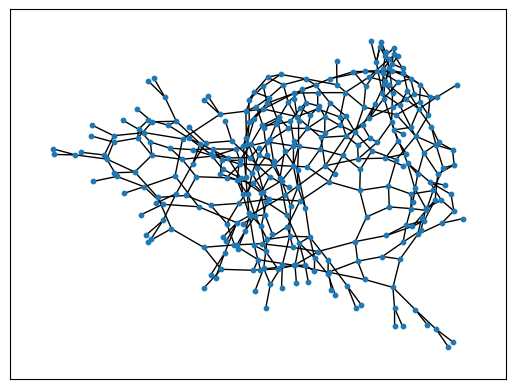

(335,)


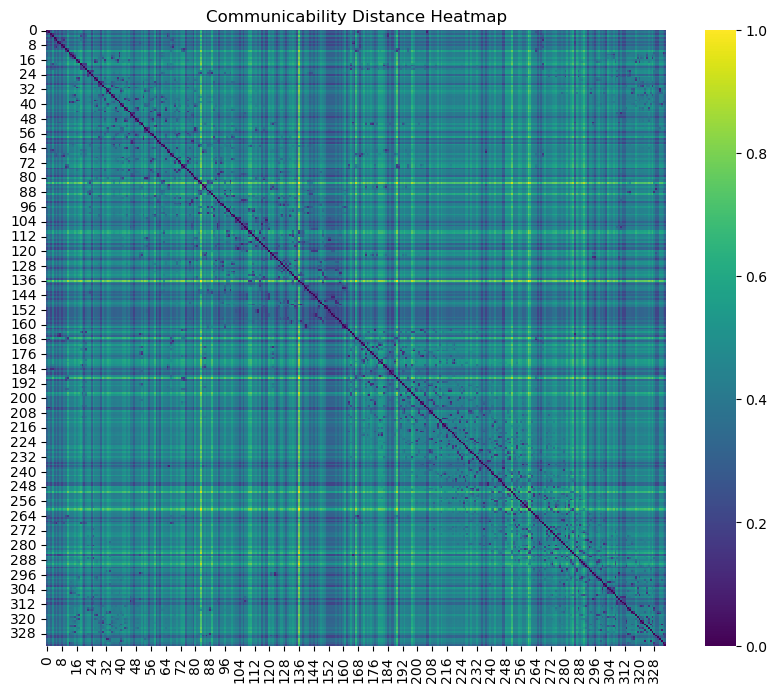

In [22]:
D=np.zeros((len(B),len(B)))
for i in range(len(B)):
    for j in range(len(B)):
        D[i,j]=B[i,i]+B[j,j]-2*B[i,j]
print(D) # D is the communicability matrix of the graph 
print(B)
C=A*D# is the communicability distance matrix
print(C)
G1=nx.from_numpy_array(C)
nx.draw_networkx(G1,with_labels=False,node_size=10)
# plt.savefig("Communicability_Structure_of_The_Network.png") 
plt.show()
print(np.shape(G1))
# Generate Heatmap for communicability distance matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
Ds=scaled_metric(D)
sns.heatmap(Ds, cmap='viridis')
plt.title("Communicability Distance Heatmap")
plt.savefig(f"{pic}initial-Communicability_Distance_Heatmap.png")
plt.show()

In [23]:
# print(dict(nx.floyd_warshall(G1)))

In [24]:
print(G1.number_of_edges(),G.number_of_edges())  # To check the number of edges of each Graph

494 494


In [25]:
source_node = 1  #  We can always change the source node
# shortest_paths_dijkstra = nx.single_source_dijkstra_path_length(G1, source=source_node, weight='weight')
#-------------------------------------------------------------------------------------------------------
#This code below is generating the communicability shortest distance 
shortest_paths_dijkstra1 = nx.shortest_path(G1, source=source_node, weight='weight')
# print(shortest_paths_dijkstra1)
# print("Shortest paths using Dijkstra’s algorithm:", shortest_paths_dijkstra1)
#-------------------------------------------------------------------------------------------------------
# We can easily see that by computing the above code the dictionnary keys are not sorted
#---------------------------------dictionary key sorting attempts--------------------------------------------------------------------
Cpq=list( shortest_paths_dijkstra1.keys() )
Cpq.sort()
Sorted_Cpq={i:shortest_paths_dijkstra1[i] for i in Cpq} # 
print(Sorted_Cpq)
#-------------------------------------------------------------------------------------------------------

{0: [1, 0], 1: [1], 2: [1, 168, 167, 67, 268, 18, 3, 2], 3: [1, 168, 167, 67, 268, 18, 3], 4: [1, 168, 167, 67, 268, 5, 4], 5: [1, 168, 167, 67, 268, 5], 6: [1, 168, 167, 67, 268, 18, 19, 182, 194, 178, 172, 176, 51, 50, 165, 7, 6], 7: [1, 168, 167, 67, 268, 18, 19, 182, 194, 178, 172, 176, 51, 50, 165, 7], 8: [1, 168, 167, 67, 68, 9, 8], 9: [1, 168, 167, 67, 68, 9], 10: [1, 168, 264, 11, 10], 11: [1, 168, 264, 11], 12: [1, 168, 167, 189, 195, 196, 217, 225, 257, 259, 275, 287, 314, 328, 333, 12], 13: [1, 168, 167, 189, 195, 196, 217, 225, 257, 259, 275, 287, 305, 306, 13], 14: [1, 168, 167, 189, 195, 196, 217, 225, 257, 259, 275, 287, 305, 306, 13, 14], 15: [1, 168, 167, 189, 195, 196, 217, 225, 257, 259, 275, 287, 305, 306, 324, 15], 16: [1, 168, 167, 188, 180, 181, 219, 226, 254, 270, 272, 273, 290, 307, 320, 17, 16], 17: [1, 168, 167, 188, 180, 181, 219, 226, 254, 270, 272, 273, 290, 307, 320, 17], 18: [1, 168, 167, 67, 268, 18], 19: [1, 168, 167, 67, 268, 18, 19], 20: [1, 168, 167

In [26]:
shortest_paths_dijkstra2 = nx.shortest_path(G, source=source_node, weight='weight')
#shortest unweighted graph # Normal graph shortest path
#----------------------------------------------------------------------------
# print(shortest_paths_dijkstra2) // to print the unsorted one 
#----------------------------------------------------------------------------
#That uses the regular distance, This one is also not sorted 
Dpq=list( shortest_paths_dijkstra2.keys() )
Dpq.sort()
# print(Dpq)
Sorted_Dpq={i:shortest_paths_dijkstra2[i] for i in Dpq}
print(Sorted_Dpq)
                   

{0: [1, 0], 1: [1], 2: [1, 168, 167, 67, 268, 18, 3, 2], 3: [1, 168, 167, 67, 268, 18, 3], 4: [1, 168, 167, 67, 268, 5, 4], 5: [1, 168, 167, 67, 268, 5], 6: [1, 168, 167, 67, 268, 18, 3, 65, 183, 85, 122, 51, 50, 165, 7, 6], 7: [1, 168, 167, 67, 268, 18, 3, 65, 183, 85, 122, 51, 50, 165, 7], 8: [1, 168, 167, 67, 68, 9, 8], 9: [1, 168, 167, 67, 68, 9], 10: [1, 168, 167, 11, 10], 11: [1, 168, 167, 11], 12: [1, 168, 167, 189, 195, 196, 217, 225, 257, 259, 275, 287, 305, 306, 13, 12], 13: [1, 168, 167, 189, 195, 196, 217, 225, 257, 259, 275, 287, 305, 306, 13], 14: [1, 168, 167, 189, 195, 196, 217, 225, 257, 259, 275, 287, 305, 306, 13, 14], 15: [1, 168, 167, 188, 180, 181, 219, 227, 248, 274, 277, 291, 313, 321, 327, 15], 16: [1, 168, 167, 188, 180, 181, 219, 226, 245, 260, 284, 290, 307, 320, 17, 16], 17: [1, 168, 167, 188, 180, 181, 219, 226, 245, 260, 284, 290, 307, 320, 17], 18: [1, 168, 167, 67, 268, 18], 19: [1, 168, 167, 67, 268, 18, 19], 20: [1, 168, 167, 67, 268, 18, 20], 21: [1,

In [27]:
len(Sorted_Cpq)==len(Sorted_Dpq)
A1=Sorted_Cpq.keys()
# print(A1)
A2=Sorted_Dpq.keys()
# print(A2)
A1==A2
A1_values=Sorted_Cpq.values()# shortest regular distance path
# Now my task is to sort the keys of both the dictionnaries :
# print(A1_values)

In [28]:
A2_values=Sorted_Dpq.values() #shortest communicability path 
# print(list(A2_values
A1_values==A2_values
A22=[len(i) for i in list(A2_values)]
# print(A22)
A11=[len(i) for i in list(A1_values)] # It is the list of the paths lengths in Cpq_values ie associated to a given node
print(len(A11))

335


In [29]:
indx=[]
for i in range(len(A11)):
    if A11[i]!=A22[i] :
        indx.append(i)
print(len(indx))
comp=[]
CpqA11=[] #
DpqA22=[]
#creating now list that stores values when com_SP>Regularshortest(or else) and when they are equal
Cpq_great=[]
Cpq_eq_Sp=[]
for i in indx :
    CpqA11.append(A11[i])# communicability distance for the indices where Cpq differ from Dpq 
    DpqA22.append(A22[i])# regular shortest path the indices where Cpq differ from Dpq
    comp.append((A11[i],A22[i]))
print(len(DpqA22))
# print(comp)
#creating now list that stores values when com_SP>Regularshortest(or else) and when they are equal
Cpq_great=[]
Spq_great=[]
Cpq_eq_Sp=[]
for i in range(len(A11)):
    if A11[i]>A22[i]:
        Cpq_great.append(A11[i])
    elif A11[i]<A22[i]:
        Spq_great.append(A22[i])
    else :
        Cpq_eq_Sp.append(A11[i])
print( len(Cpq_great),len(Cpq_eq_Sp) )


63
63
63 272


# Plot pie chart showing differences in Proportion

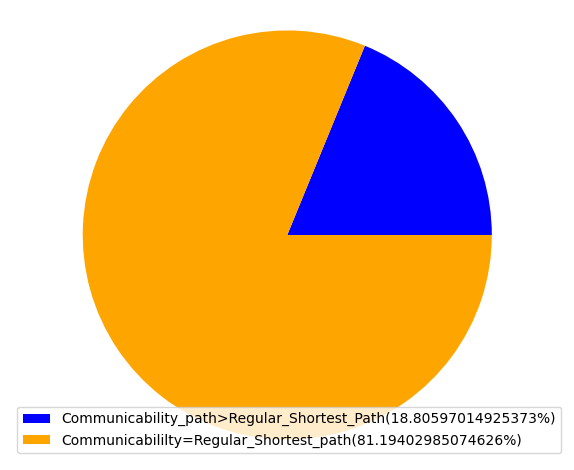

In [30]:
# The slices will be ordered and plotted counter-clockwise.
P1=(len(Cpq_great)/len(A11))*100
P2=(len(Cpq_eq_Sp)/len(A11))*100
labels = [f'Communicability_path>Regular_Shortest_Path({P1}%)', f'Communicabililty=Regular_Shortest_path({P2}%)']
sizes = [P1,P2]
colors = ['blue', 'orange']
patches, texts = plt.pie(sizes, colors=colors, startangle=0)
plt.legend(patches, labels,loc='best')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.savefig(f"{pic}Initial-Shorest-path-comparison-pie-chart.png")
plt.show()

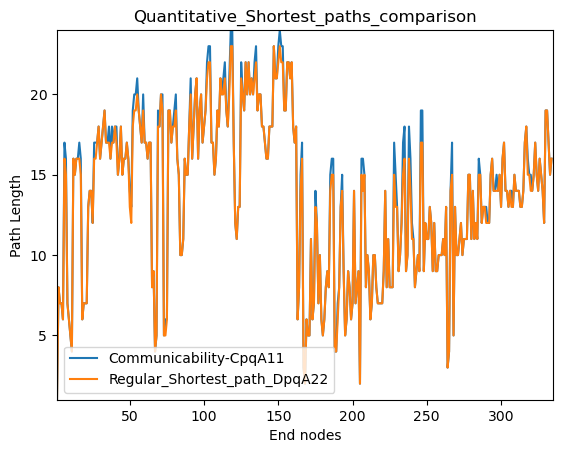

In [31]:
plt.plot(range(len(A11)), A11, label = "Communicability-CpqA11")
plt.plot(range(len(A11)), A22, label = "Regular_Shortest_path_DpqA22")
plt.xlim(1,len(A11))
plt.ylim(1,max(A11))
plt.xlabel('End nodes')
plt.ylabel('Path Length')
plt.title('Quantitative_Shortest_paths_comparison')
plt.legend()
plt.savefig(f"{pic}Initial-Quantitative_Shorest_paths_comparison_Plot.png")
plt.show()
# A11

In [32]:
Sorted_Dpq

{0: [1, 0],
 1: [1],
 2: [1, 168, 167, 67, 268, 18, 3, 2],
 3: [1, 168, 167, 67, 268, 18, 3],
 4: [1, 168, 167, 67, 268, 5, 4],
 5: [1, 168, 167, 67, 268, 5],
 6: [1, 168, 167, 67, 268, 18, 3, 65, 183, 85, 122, 51, 50, 165, 7, 6],
 7: [1, 168, 167, 67, 268, 18, 3, 65, 183, 85, 122, 51, 50, 165, 7],
 8: [1, 168, 167, 67, 68, 9, 8],
 9: [1, 168, 167, 67, 68, 9],
 10: [1, 168, 167, 11, 10],
 11: [1, 168, 167, 11],
 12: [1,
  168,
  167,
  189,
  195,
  196,
  217,
  225,
  257,
  259,
  275,
  287,
  305,
  306,
  13,
  12],
 13: [1, 168, 167, 189, 195, 196, 217, 225, 257, 259, 275, 287, 305, 306, 13],
 14: [1,
  168,
  167,
  189,
  195,
  196,
  217,
  225,
  257,
  259,
  275,
  287,
  305,
  306,
  13,
  14],
 15: [1,
  168,
  167,
  188,
  180,
  181,
  219,
  227,
  248,
  274,
  277,
  291,
  313,
  321,
  327,
  15],
 16: [1,
  168,
  167,
  188,
  180,
  181,
  219,
  226,
  245,
  260,
  284,
  290,
  307,
  320,
  17,
  16],
 17: [1, 168, 167, 188, 180, 181, 219, 226, 245, 260,

# III Test and Implement Hybrid Measure of Network Distance 

\begin{equation}
H_{pq}=\alpha d_{pq} +\beta d_{co_2}(p,q) +\gamma C_{pq}
\end{equation}

In [33]:
def floyd_warshall_shortest_paths_from_edgelist(G):
    # Compute shortest path lengths between all pairs of nodes using Floyd-Warshall
    shortest_paths = dict(nx.floyd_warshall(G))
    # Get all nodes in the graph
    nodes = list(G.nodes())
    num_nodes = len(nodes)
    # Initializing the shortest path matrix with zeros
    sp_matrix = np.full((num_nodes, num_nodes), np.inf)
    print(sp_matrix)
    # Then fill the matrix with the computed shortest paths
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            sp_matrix[i, j] = shortest_paths[u][v]
    return sp_matrix, nodes
# The command below computes the shortest paths from the edge list
shortest_paths_matrix, nodes =floyd_warshall_shortest_paths_from_edgelist(G)
# Displaying the result
nodes.sort()
print("Nodes:", nodes)
print("Shortest Path Matrix:")
D_sp=shortest_paths_matrix
print(shortest_paths_matrix)

[[inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 ...
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]]
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 

In order to be able to sum up all the three metric, we need to normalize them so that their values lies between \[0-1\]. Hence Our Normalized novel metric is now defined as :
\begin{equation}
H_{pq}=\alpha\frac{d_{sp}}{max(d_{sp})} +\gamma\frac{d_{co2}}{max(d_{Co2})}+\gamma\frac{C_{pq}}{max(C_{pq})}
\end{equation}

[[ 0.  1.  8. ... 17. 15. 16.]
 [ 1.  0.  7. ... 16. 14. 15.]
 [ 8.  7.  0. ... 14. 17. 18.]
 ...
 [17. 16. 14. ...  0. 12. 13.]
 [15. 14. 17. ... 12.  0.  1.]
 [16. 15. 18. ... 13.  1.  0.]]
[[0.         1.47447097 0.         ... 0.         0.         0.        ]
 [1.47447097 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.55027469]
 [0.         0.         0.         ... 0.         1.55027469 0.        ]]
Testing for : alpha=0.3, beta=0.1, gamma=0.5


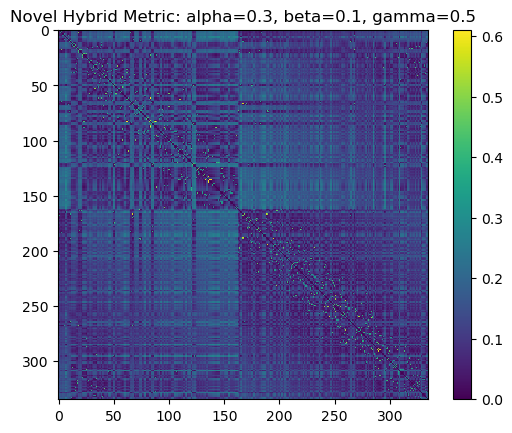

Testing for : alpha=0.3, beta=0.1, gamma=0.7


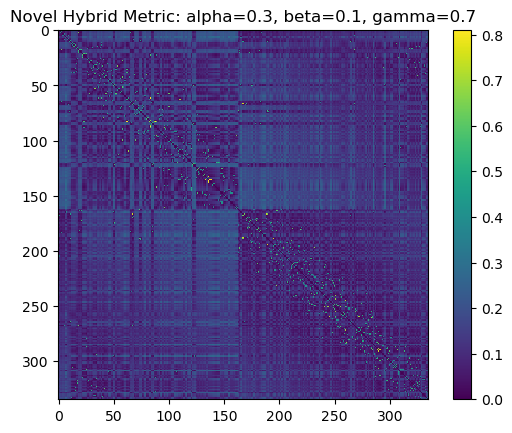

Testing for : alpha=0.3, beta=0.1, gamma=0.9


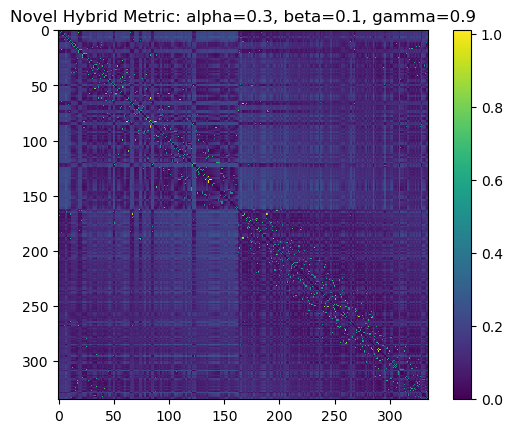

Testing for : alpha=0.3, beta=0.3, gamma=0.5


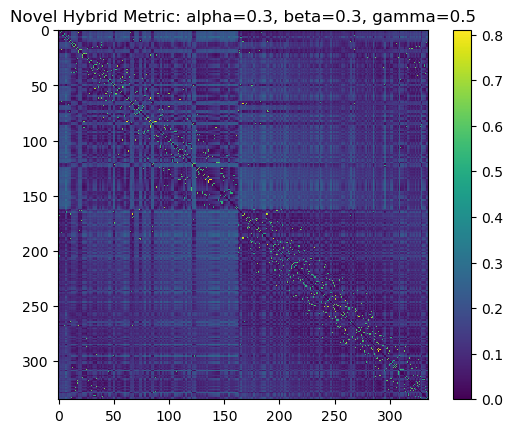

Testing for : alpha=0.3, beta=0.3, gamma=0.7


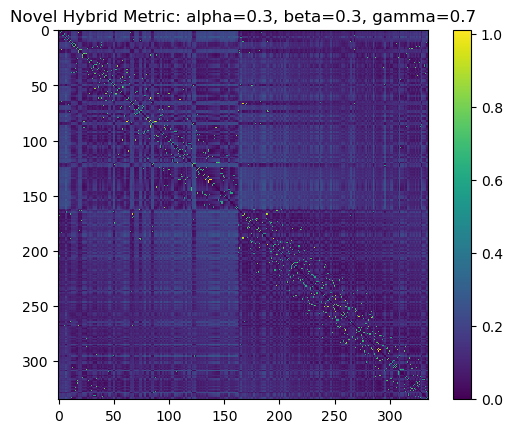

Testing for : alpha=0.3, beta=0.3, gamma=0.9


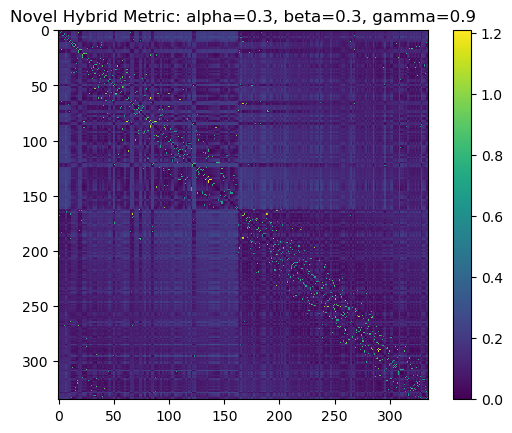

Testing for : alpha=0.3, beta=0.5, gamma=0.5


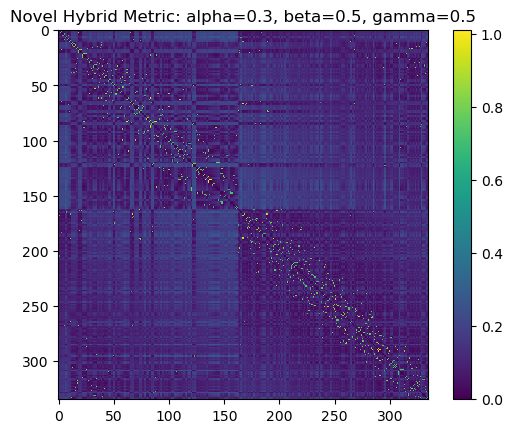

Testing for : alpha=0.3, beta=0.5, gamma=0.7


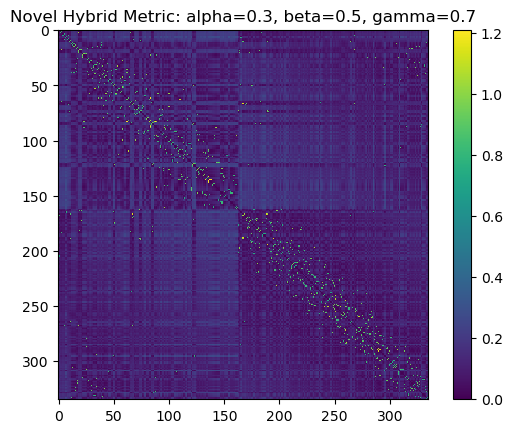

Testing for : alpha=0.3, beta=0.5, gamma=0.9


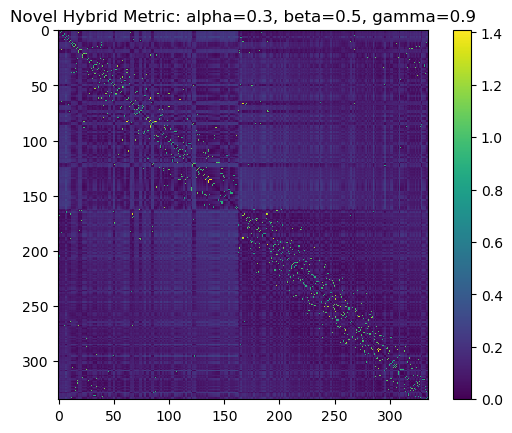

Testing for : alpha=0.5, beta=0.1, gamma=0.5


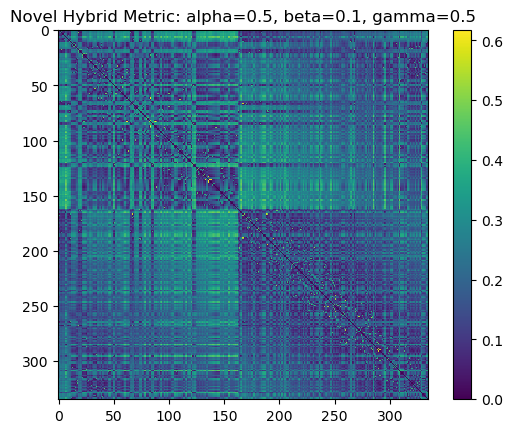

Testing for : alpha=0.5, beta=0.1, gamma=0.7


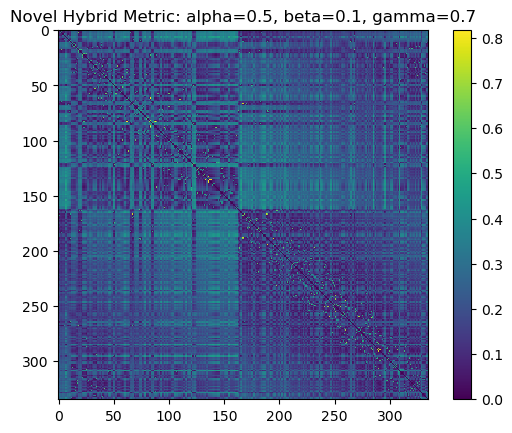

Testing for : alpha=0.5, beta=0.1, gamma=0.9


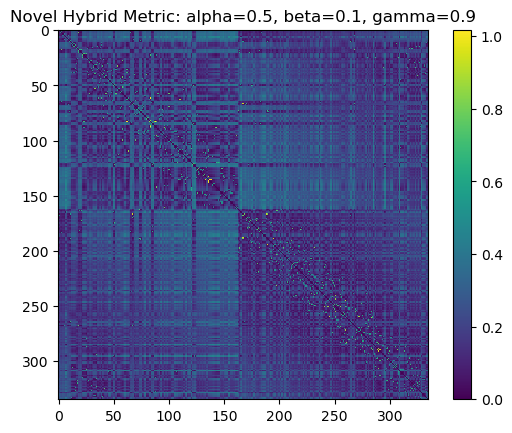

Testing for : alpha=0.5, beta=0.3, gamma=0.5


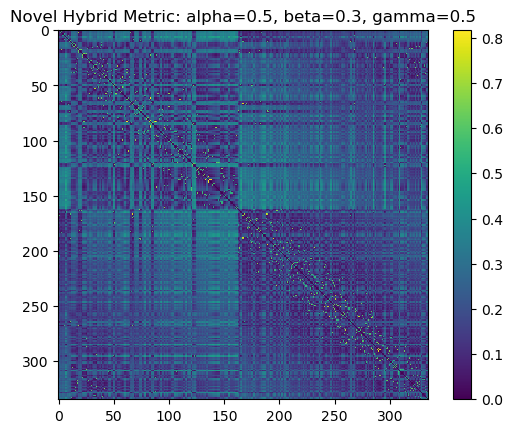

Testing for : alpha=0.5, beta=0.3, gamma=0.7


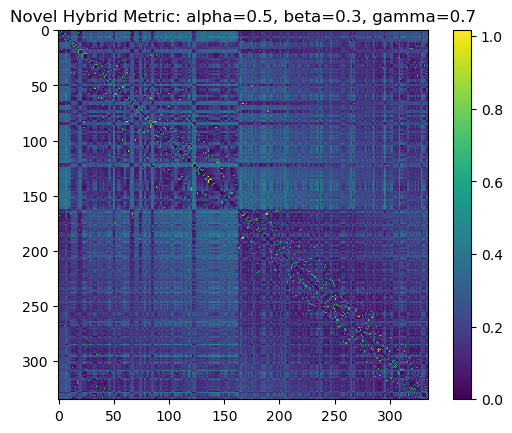

Testing for : alpha=0.5, beta=0.3, gamma=0.9


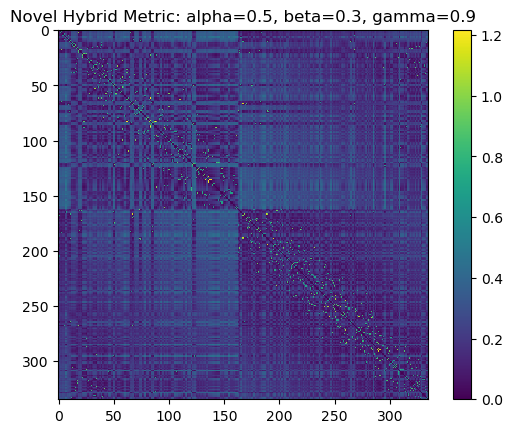

Testing for : alpha=0.5, beta=0.5, gamma=0.5


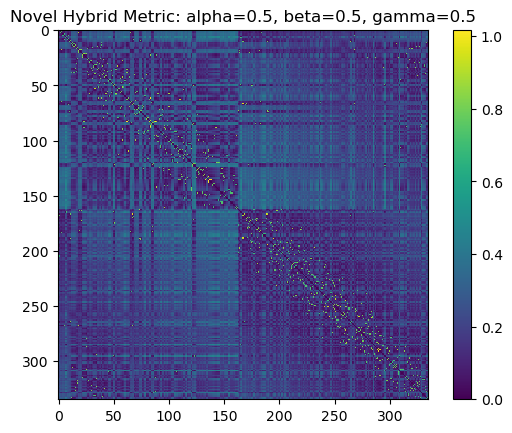

Testing for : alpha=0.5, beta=0.5, gamma=0.7


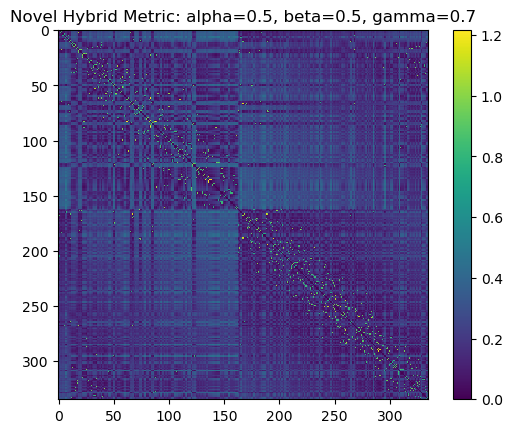

Testing for : alpha=0.5, beta=0.5, gamma=0.9


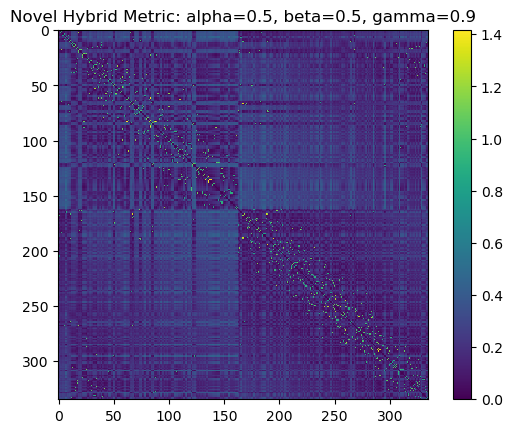

Testing for : alpha=0.7, beta=0.1, gamma=0.5


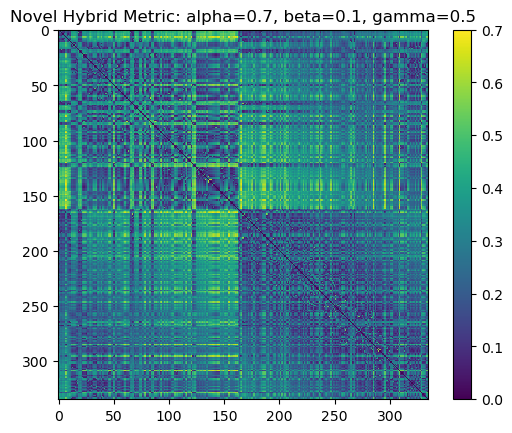

Testing for : alpha=0.7, beta=0.1, gamma=0.7


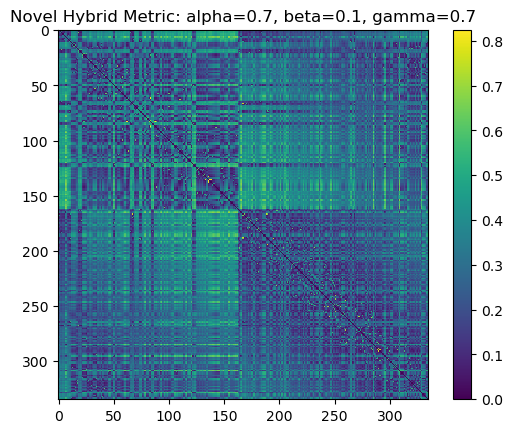

Testing for : alpha=0.7, beta=0.1, gamma=0.9


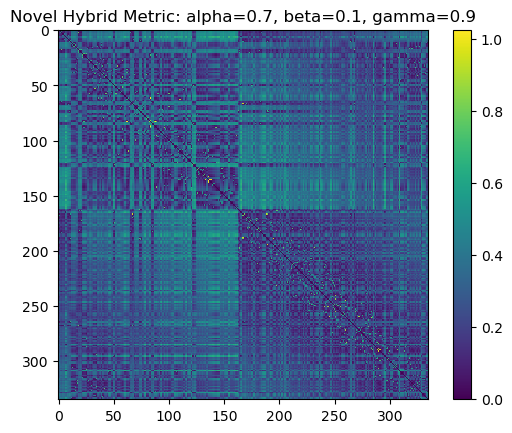

Testing for : alpha=0.7, beta=0.3, gamma=0.5


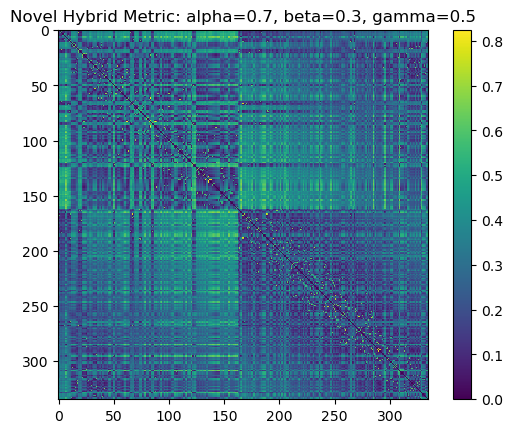

Testing for : alpha=0.7, beta=0.3, gamma=0.7


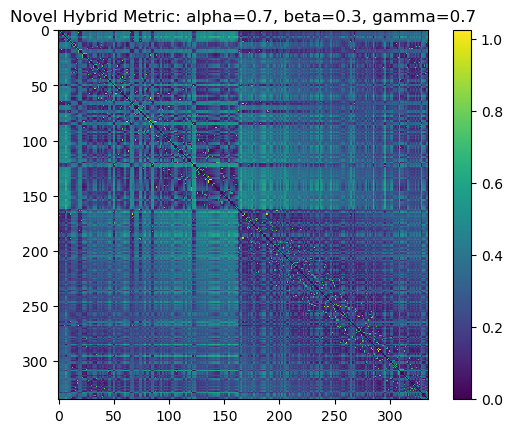

Testing for : alpha=0.7, beta=0.3, gamma=0.9


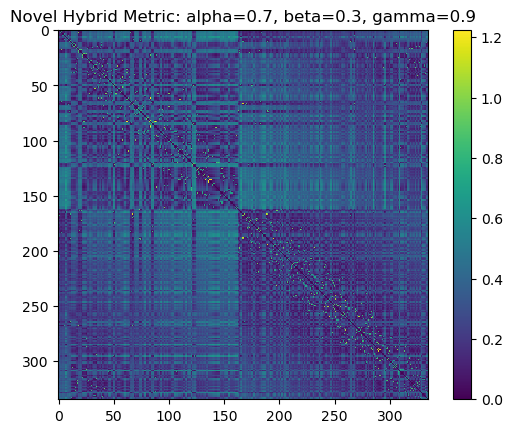

Testing for : alpha=0.7, beta=0.5, gamma=0.5


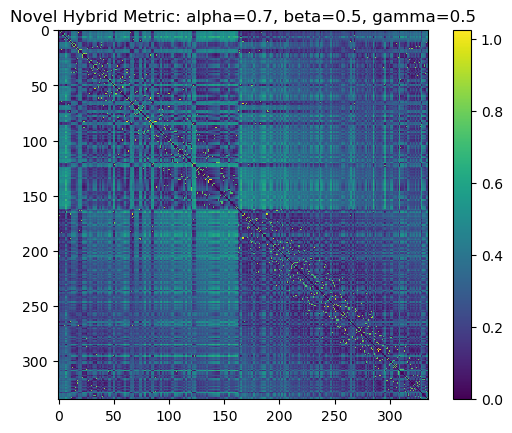

Testing for : alpha=0.7, beta=0.5, gamma=0.7


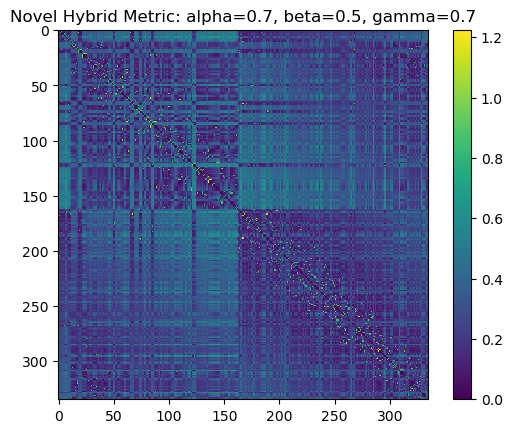

Testing for : alpha=0.7, beta=0.5, gamma=0.9


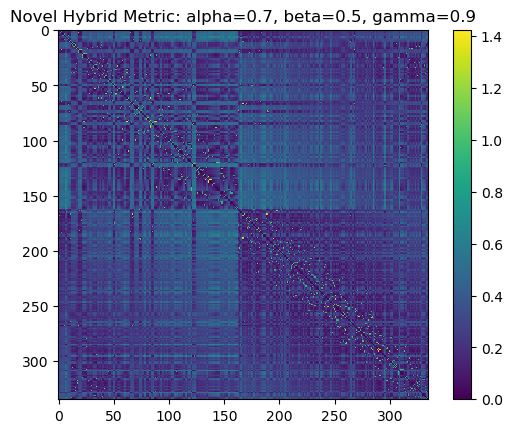

In [34]:
# Naturally , We need to initialize the parameters grid for alpha, beta, and gamma as follow :
alpha_values = [0.3, 0.5, 0.7]
beta_values = [0.1, 0.3, 0.5]
gamma_values = [0.5, 0.7, 0.9]

print(D_sp)# D_sp: represents the shortest path distance matrix
print(C) # C: represent the communicability distance matrix

# To automate the computation we define a function to compute the hybrid distances for every set of grid value:

#---------------------------definition of our function----------------------------------
def H_metric(alpha, beta, gamma, A, C, D_sp):
    # we then normalize each distance matrix by dividing by its max value
    A_norm = A / np.max(A)
    C_norm = C / np.max(C)
    D_sp_norm = D_sp / np.max(D_sp)
    #print(A_norm)
    # Compute the hybrid distance matrix
    return alpha*D_sp_norm + beta*A_norm + gamma * C_norm 
#-------------------------end---definition of our function----------------------------------

# Then for every set of values of the parameter grid we compute the hybrid metric and plot the 
# corresponding heatmap
for alpha in alpha_values:
    for beta in beta_values:
        for gamma in gamma_values:
            print(f"Testing for : alpha={alpha}, beta={beta}, gamma={gamma}")
            H = H_metric(alpha, beta, gamma, A, C, D_sp)
            plt.figure()
            plt.imshow(H, cmap='viridis', interpolation='none')
            plt.colorbar()
            plt.title(f"Novel Hybrid Metric: alpha={alpha}, beta={beta}, gamma={gamma}")
            plt.savefig(f"{pic}Novel Hybrid Metric: alpha={alpha}, beta={beta}, gamma={gamma}.png")
            plt.show()

# II. Task compare distribution of nodes in the shortest path 

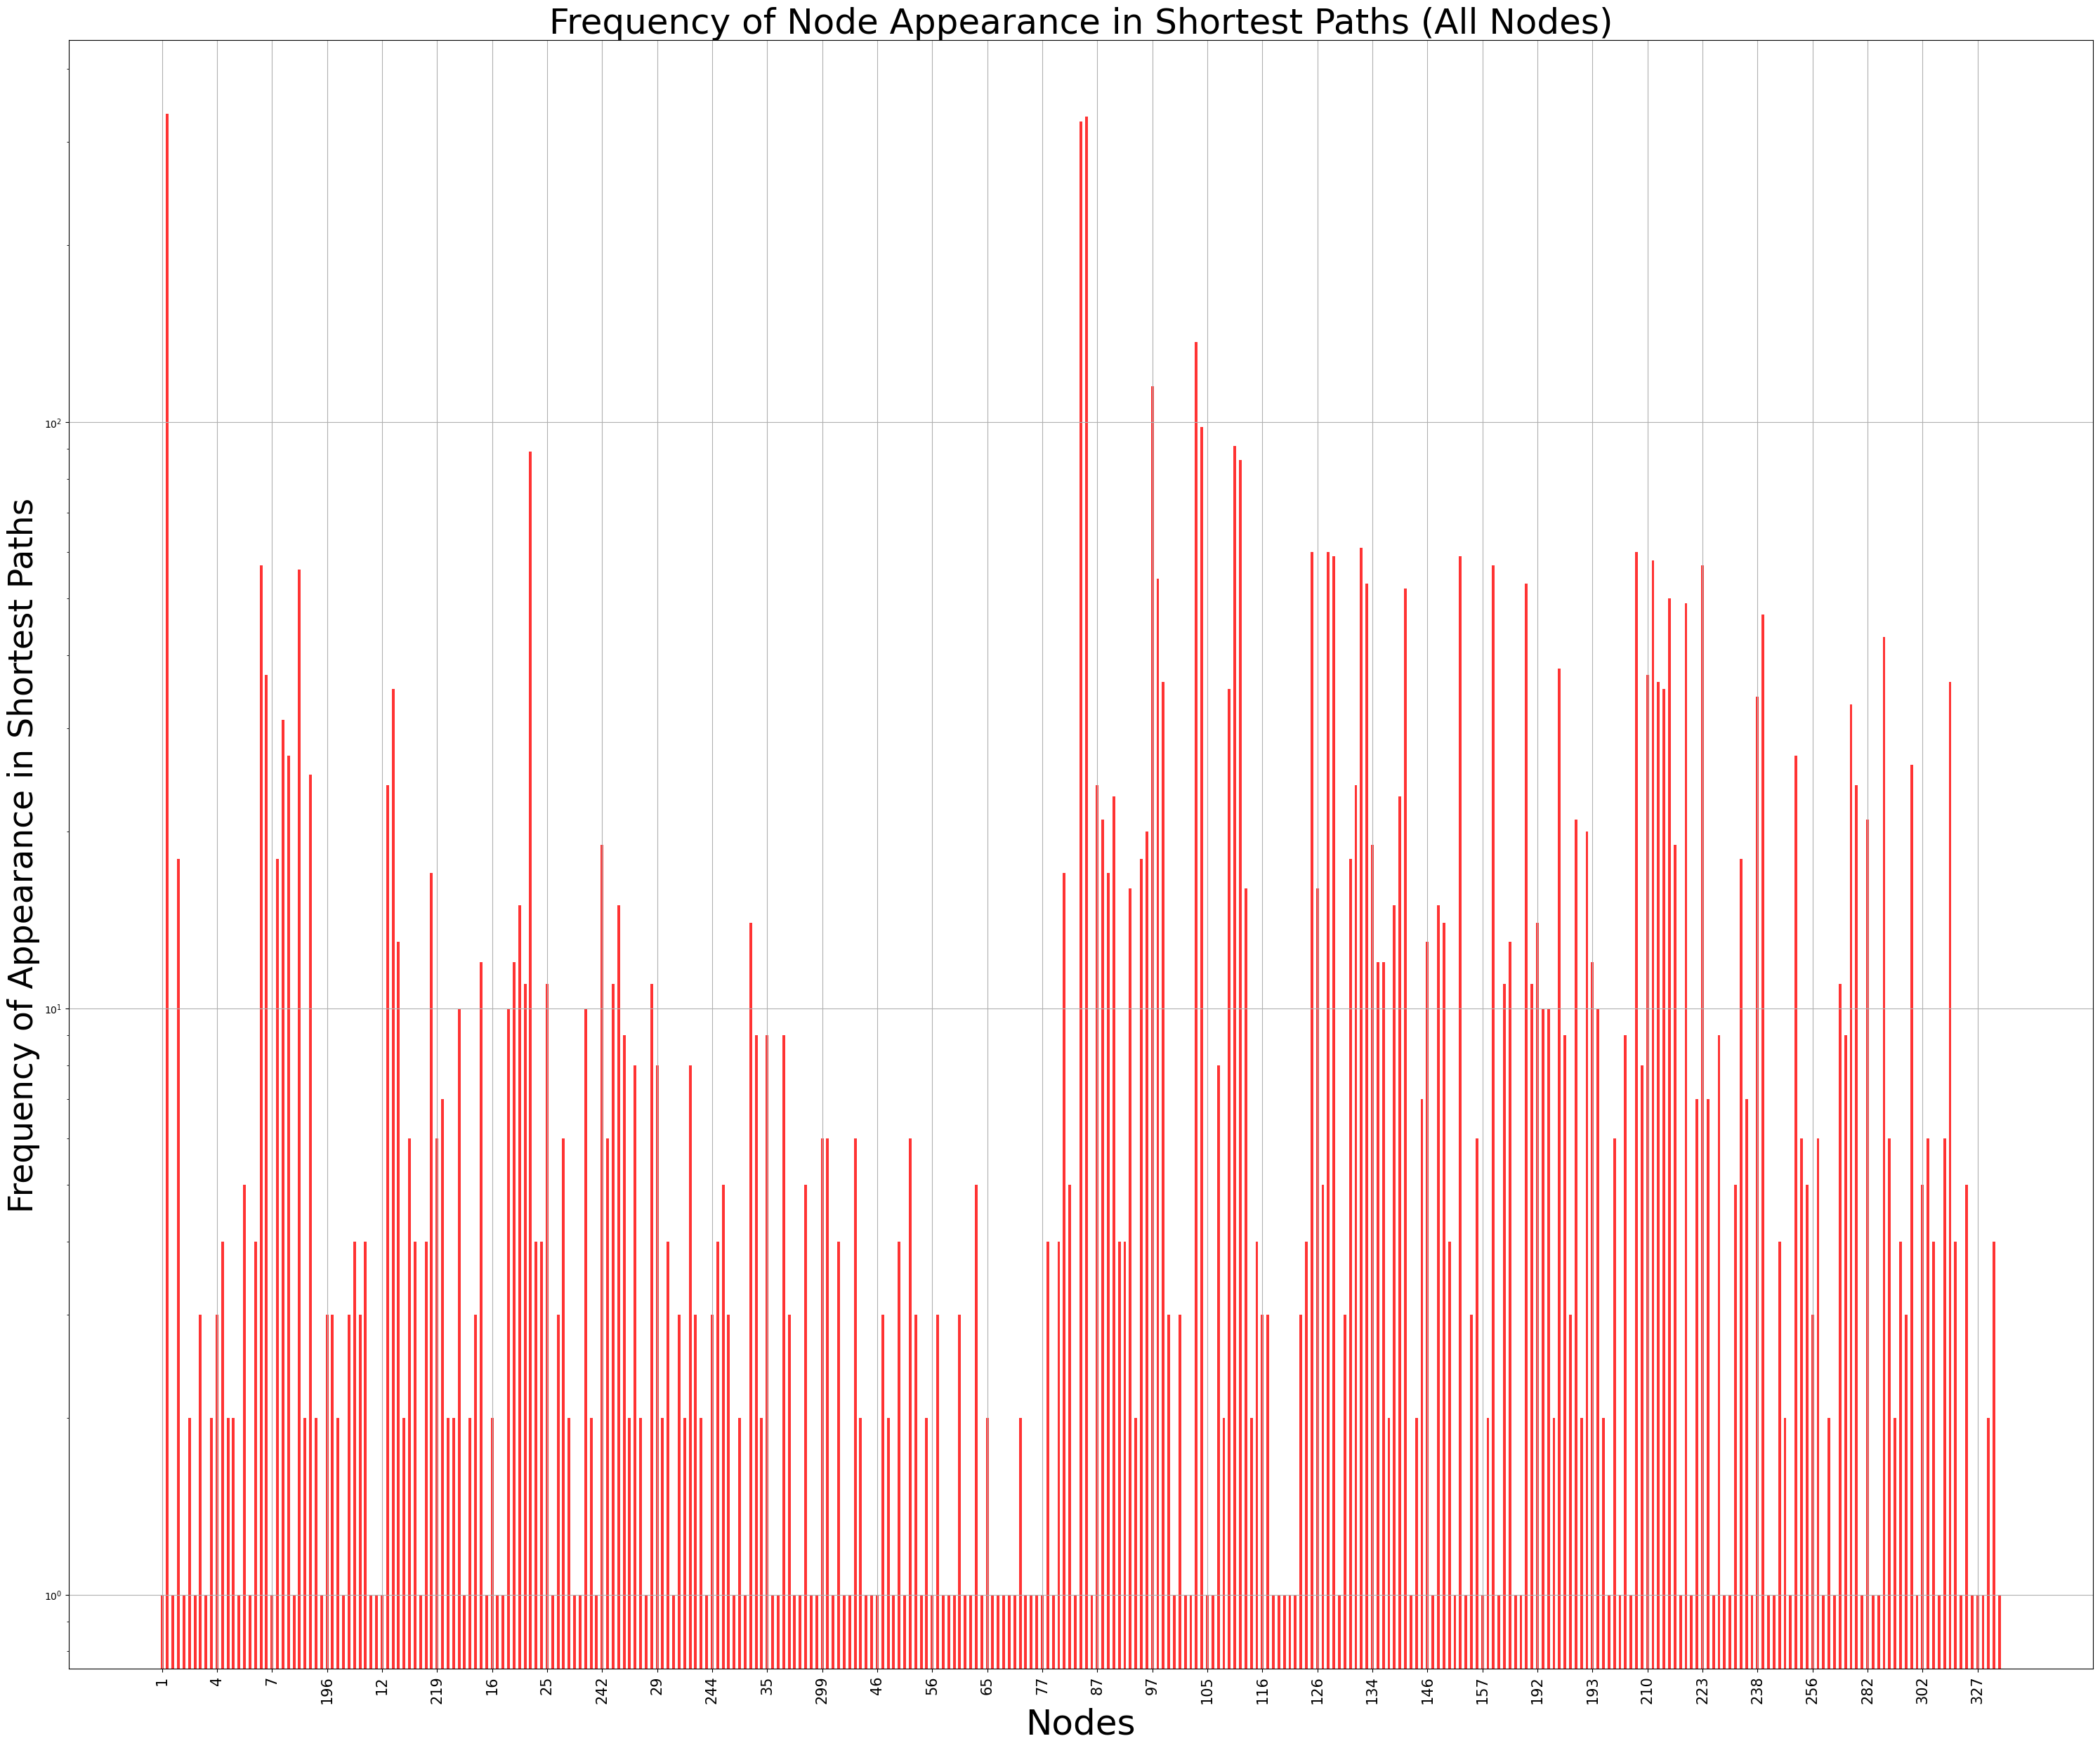

In [35]:
# Initializing a list to store all nodes from the paths
all_nodes_in_paths = []

# Collecting all nodes from the values (which are paths)
for path in Sorted_Cpq.values():
    all_nodes_in_paths.extend(path)  # Then append all nodes in each path to the list

# Now count the frequency of each node across all paths
node_frequencies = Counter(all_nodes_in_paths)

# Then we separate the nodes ids and their corresponding frequencies
nodes = list(node_frequencies.keys())
frequencies = list(node_frequencies.values())


plt.figure(figsize=(30, 25))  # Increasing the figure size for better visibility
plt.bar(nodes, frequencies, color='r', alpha=0.8, width=0.5)  # Also adjusting the bar width
plt.xlabel('Nodes', fontsize=36)
plt.ylabel('Frequency of Appearance in Shortest Paths', fontsize=34)
plt.title('Frequency of Node Appearance in Shortest Paths (All Nodes)', fontsize=36)

# To avoid stack we rotate x-axis labels further for better readability
plt.xticks(rotation=90, fontsize=15)

# Adjusting the y-axis to log scale since the size of the network are big
plt.yscale('log')

# Reducing the number of x-ticks to avoid clutter
plt.xticks(ticks=range(0, len(nodes), 10), labels=nodes[::10], rotation=90)

plt.grid(True)
plt.tight_layout()  # In order to ensure everything fits within the figure
plt.savefig(f"{pic}Cpq-distribution.png")
plt.show()


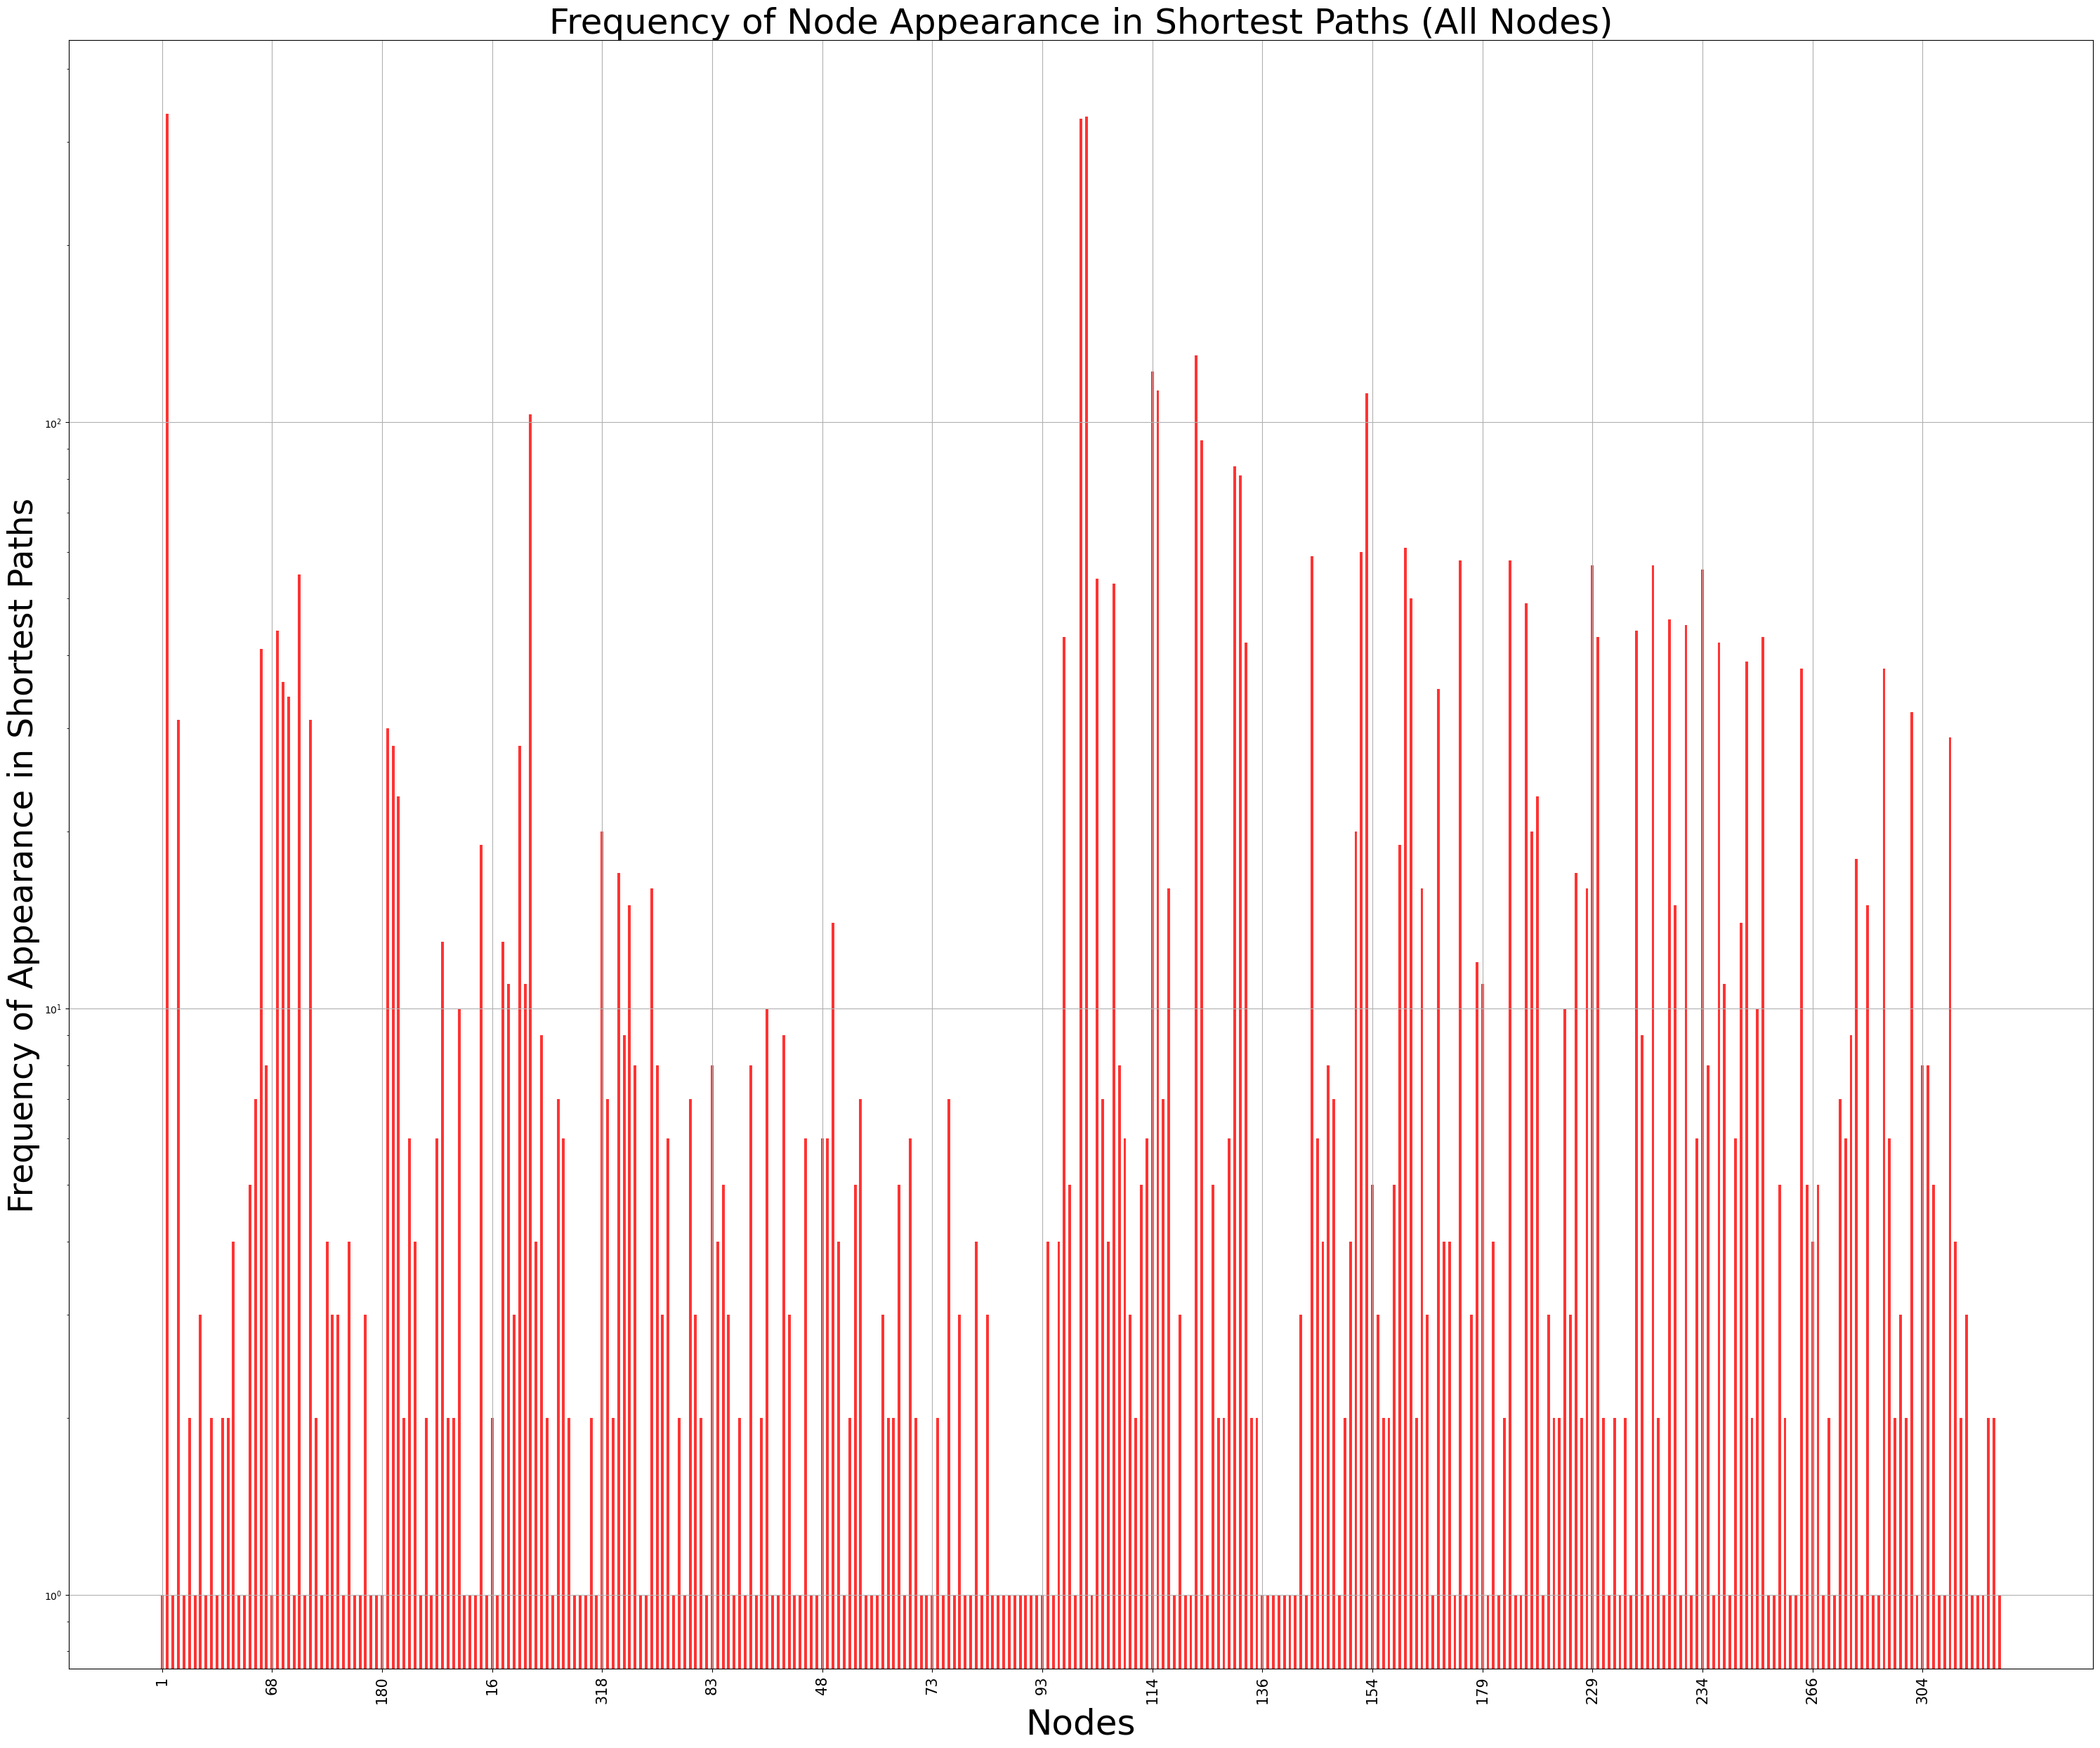

In [36]:
# Initializing a list to store all nodes from the paths
all_nodes_in_paths = []

# Collecting all nodes from the values (which are paths)
for path in Sorted_Dpq.values():
    all_nodes_in_paths.extend(path)  # Append all nodes in each path to the list
# Counting the frequency of each node across all paths
node_frequencies = Counter(all_nodes_in_paths)
# Separating the node ids and their corresponding frequencies
nodes = list(node_frequencies.keys())
frequencies = list(node_frequencies.values())

plt.figure(figsize=(30, 25))  # Increasing the figure size for better visibility
plt.bar(nodes, frequencies, color='r', alpha=0.8, width=0.5) 
plt.xlabel('Nodes', fontsize=36)
plt.ylabel('Frequency of Appearance in Shortest Paths', fontsize=34)
plt.title('Frequency of Node Appearance in Shortest Paths (All Nodes)', fontsize=36)

plt.xticks(rotation=90, fontsize=15)
plt.yscale('log')
plt.xticks(ticks=range(0, len(nodes), 20), labels=nodes[::20], rotation=90)
plt.grid(True)
plt.tight_layout() 
plt.savefig(f"{pic}dsp-distribution.png")
plt.show()

# III. Rewiring Strategy

Node 3 has higher frequency in regular (31) than communicability (18).
Node 10 has higher frequency in communicability (3) than regular (1).
Node 11 has higher frequency in communicability (4) than regular (2).
Node 13 has higher frequency in regular (4) than communicability (2).
Node 15 has higher frequency in communicability (5) than regular (1).
Node 16 has higher frequency in regular (5) than communicability (1).
Node 17 has higher frequency in regular (7) than communicability (4).
Node 18 has higher frequency in communicability (57) than regular (41).
Node 19 has higher frequency in communicability (37) than regular (8).
Node 21 has higher frequency in regular (44) than communicability (18).
Node 22 has higher frequency in regular (36) than communicability (31).
Node 23 has higher frequency in regular (34) than communicability (27).
Node 25 has higher frequency in communicability (56) than regular (55).
Node 26 has higher frequency in communicability (2) than regular (1).
Node 27 

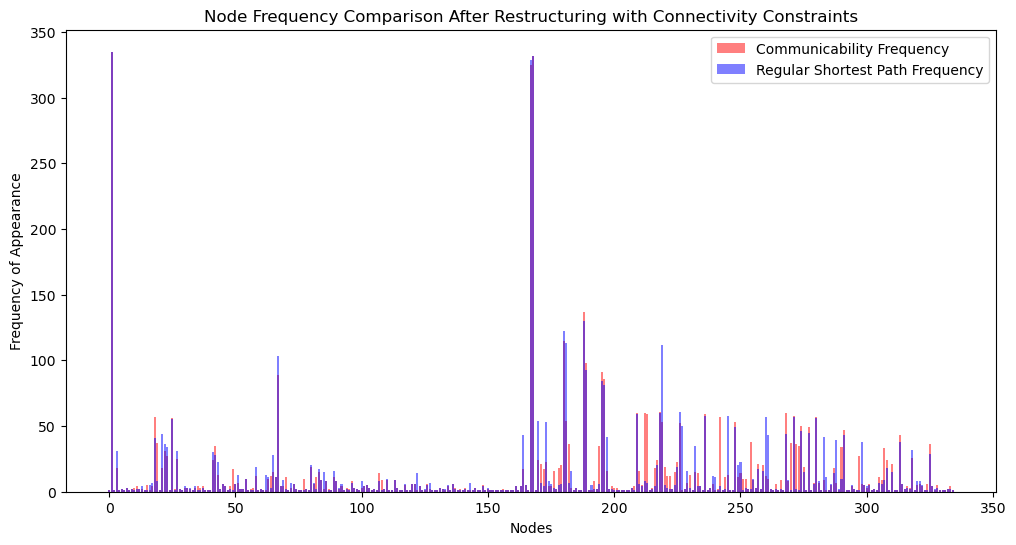

In [37]:
# Defining a function that counts node frequencies in the paths
def count_node_frequencies(paths_dict):
    all_nodes = []
    for path in paths_dict.values():
        all_nodes.extend(path)
    return Counter(all_nodes)

# Below: Computing frequencies for both distributions
comm_freq = count_node_frequencies(Sorted_Cpq)
reg_freq = count_node_frequencies(Sorted_Dpq)

# Initialization graph for modification purposes : G'<-----Graph init
Gmod = nx.Graph()

# Adding  edges from paths to the graph (representing the original network)
for path in Sorted_Cpq.values():
    nx.add_path(Gmod, path)
for path in Sorted_Dpq.values():
    nx.add_path(Gmod, path)

# Getting  the original number of edges and nodes
original_num_edges = Gmod.number_of_edges()
original_num_nodes = Gmod.number_of_nodes()

# Then ensuring that the original graph is connected
assert nx.is_connected(Gmod), "The original graph is not connected!"

# Checcking/ Adjust node degrees based on frequency comparisons
for node in set(comm_freq.keys()).union(set(reg_freq.keys())):
    comm_count = comm_freq.get(node, 0)
    reg_count = reg_freq.get(node, 0)

    # Case 1: When the frequency is higher in the communicability distribution
    if comm_count > reg_count:
        diff = comm_count - reg_count
        print(f"Node {node} has higher frequency in communicability ({comm_count}) than regular ({reg_count}).")

        # We attempt to reroute some paths to other nearby nodes
        neighbors = list(Gmod.neighbors(node))
        for _ in range(diff):
            if len(neighbors) > 0:
                # Then shift some connections to nearby nodes without disconnecting
                neighbor = neighbors.pop(0)
                if Gmod.has_edge(node, neighbor):
                    Gmod.remove_edge(node, neighbor)
                    # Check if removing the edge disconnects the graph
                    if not nx.is_connected(Gmod):
                        # Then we have to revert the removal if it disconnects the graph
                        Gmod.add_edge(node, neighbor)
                    else:
                        # Then here add the edge to a new node if possible
                        new_neighbor = max(Gmod.nodes()) + 1 if neighbor not in Gmod else neighbor
                        Gmod.add_edge(node, new_neighbor)

    # Case 2: When the frequency is higher in the regular shortest path distribution
    elif reg_count > comm_count:
        diff = reg_count - comm_count
        print(f"Node {node} has higher frequency in regular ({reg_count}) than communicability ({comm_count}).")

        # Then shift some connections to/from this node to balance
        neighbors = list(Gmod.neighbors(node))
        for _ in range(diff):
            if len(neighbors) > 0:
                neighbor = neighbors.pop(0)
                if Gmod.has_edge(node, neighbor):
                    Gmod.remove_edge(node, neighbor)
                    # Check if removing the edge disconnects the graph
                    if not nx.is_connected(Gmod):
                        # Then we have to revert the removal if it disconnects the graph
                        Gmod.add_edge(node, neighbor)
                    else:
                        # Then we add the edge to a new node if possible
                        new_neighbor = max(Gmod.nodes()) + 1 if neighbor not in Gmod else neighbor
                        Gmod.add_edge(node, new_neighbor)

# Connectedness check : ensure no new edges or nodes are added, and the graph remains connected
assert nx.is_connected(Gmod), "The graph became disconnected!"
assert Gmod.number_of_edges() <= original_num_edges, "More edges were added than allowed!"
assert Gmod.number_of_nodes() <= original_num_nodes, "More nodes were added than allowed!"

# Then recompute the frequencies after modification
new_comm_freq = count_node_frequencies(Sorted_Cpq)
new_reg_freq = count_node_frequencies(Sorted_Dpq)

# Then plot updated frequencies
nodes = sorted(set(new_comm_freq.keys()).union(set(new_reg_freq.keys())))
comm_freq_values = [new_comm_freq.get(node, 0) for node in nodes]
reg_freq_values = [new_reg_freq.get(node, 0) for node in nodes]

#Plotting the updated distributions
plt.figure(figsize=(12, 6))
plt.bar(nodes, comm_freq_values, alpha=0.5, color='r', label="Communicability Frequency")
plt.bar(nodes, reg_freq_values, alpha=0.5, color='b', label="Regular Shortest Path Frequency")
plt.xlabel('Nodes')
plt.ylabel('Frequency of Appearance')
plt.title('Node Frequency Comparison After Restructuring with Connectivity Constraints')
plt.legend()
plt.savefig(f"{pic}matching-distribution.png")
plt.show()


## Load Original Network 

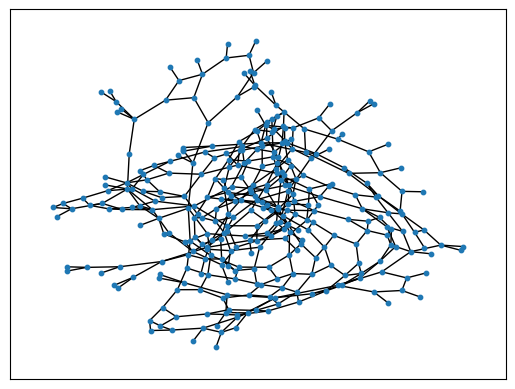

In [38]:
nx.draw_networkx(G,with_labels=False,node_size=10)
plt.axis('on')
# plt.savefig("Final_Structure_of_The_Network.png") 
plt.show()

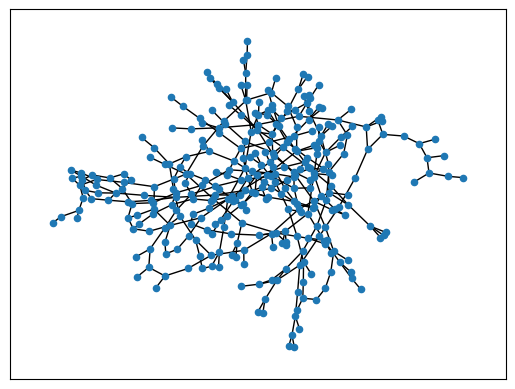

In [39]:
nx.draw_networkx(Gmod,with_labels=False,node_size=20)
plt.axis('on')
plt.savefig(f"{pic}Rewired-Final_Structure_of_The_Network.png") 
plt.show()

In [40]:
Amod=nx.to_numpy_array(Gmod)
Gmod=nx.from_numpy_array(Amod)
print(Amod)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
A=nx.to_numpy_array(G)
print(A)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [42]:
check=0
for i in range(len(A)): 
    for j in range(len(Amod)):
        if A[i,j]==Amod[i,j]:
            check+=1
print(check)

110673


In [43]:
print(f"{(1-(check/(len(A)**2)))*100}%")

1.3829360659389667%


# Check The communicabilitiy in the new Rewired Network 

[[3.03714472e+00 1.60265939e+00 2.11812660e+00 ... 3.47527389e-16
  7.06974946e-16 8.60222306e-13]
 [1.60265939e+00 1.64162908e+00 7.53886564e-01 ... 1.81071206e-17
  3.68200662e-17 5.30697843e-14]
 [2.11812660e+00 7.53886564e-01 3.51189617e+00 ... 6.29326849e-15
  1.28076881e-14 1.29993793e-11]
 ...
 [3.47527389e-16 1.81071206e-17 6.29326849e-15 ... 1.64144977e+00
  6.92234663e-01 2.40802059e-31]
 [7.06974946e-16 3.68200662e-17 1.28076881e-14 ... 6.92234663e-01
  2.38444100e+00 4.88651275e-31]
 [8.60222306e-13 5.30697843e-14 1.29993793e-11 ... 2.40800663e-31
  4.88648726e-31 1.64308105e+00]]
[[0.         1.47345503 2.3127877  ... 4.67859449 5.42158573 4.68022577]
 [1.47345503 0.         3.64575212 ... 3.28307885 4.02607008 3.28471013]
 [2.3127877  3.64575212 0.         ... 5.15334594 5.89633717 5.15497722]
 ...
 [4.67859449 3.28307885 5.15334594 ... 0.         2.64142144 3.28453082]
 [5.42158573 4.02607008 5.89633717 ... 2.64142144 0.         4.02752205]
 [4.68022577 3.28471013 5.1549

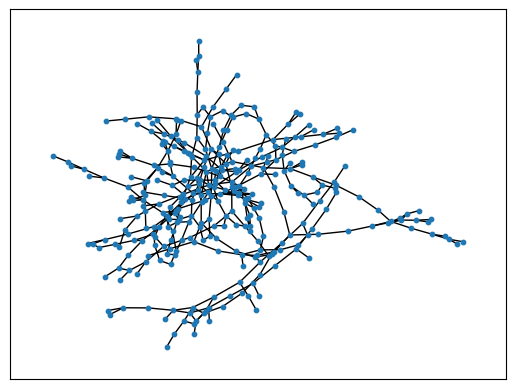

(335,)


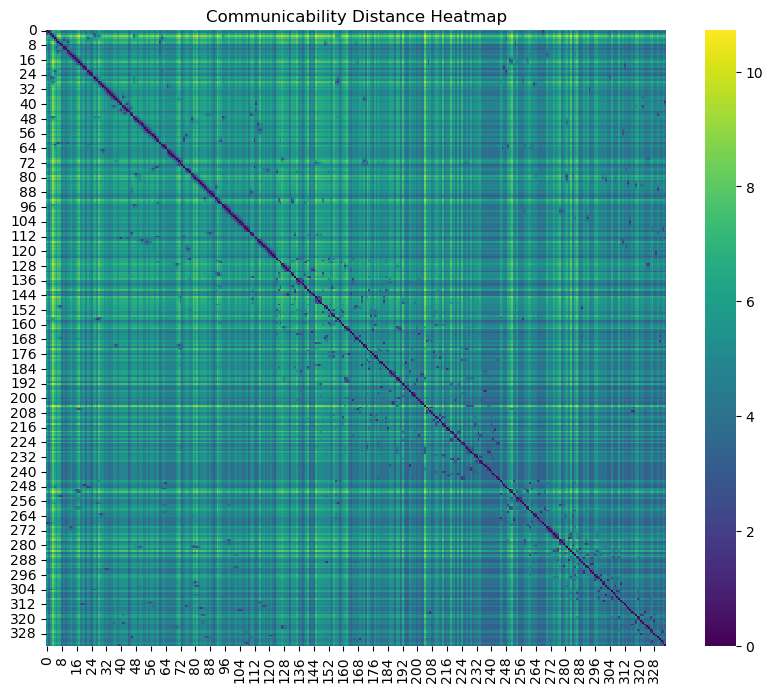

In [44]:
Bmod=sp.linalg.expm(Amod)#compute the communicability Matrix Function
print(Bmod)
Dmod=np.zeros((len(Bmod),len(Bmod)))
for i in range(len(Bmod)):
    for j in range(len(Bmod)):
        Dmod[i,j]=Bmod[i,i]+Bmod[j,j]-2*Bmod[i,j]
print(Dmod) # D is the communicability matrix of the graph 
print(Bmod)
Cmod=Amod*Dmod# is the communicability distance matrix
print(Cmod)
G11=nx.from_numpy_array(Cmod)
nx.draw_networkx(G11,with_labels=False,node_size=10)
plt.show()
print(np.shape(G11))
# Heatmap for communicability distance matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(Dmod, cmap='viridis')
plt.title("Communicability Distance Heatmap")
plt.savefig(f"{pic}rewired-Communicability_Distance_Heatmap.png")
plt.show()

{0: [1, 0], 1: [1], 2: [1, 0, 2], 3: [1, 0, 2, 3], 4: [1, 0, 2, 3, 4], 5: [1, 0, 2, 3, 4, 5], 6: [1, 0, 2, 3, 4, 5, 6], 7: [1, 0, 2, 3, 4, 5, 6, 7], 8: [1, 0, 2, 3, 4, 5, 6, 7, 8], 9: [1, 0, 2, 3, 4, 5, 9], 10: [1, 0, 2, 3, 4, 5, 9, 10], 11: [1, 0, 2, 3, 4, 5, 6, 11], 12: [1, 0, 2, 3, 4, 5, 6, 11, 12], 13: [1, 0, 2, 3, 4, 5, 6, 11, 12, 13], 14: [1, 0, 2, 3, 4, 5, 6, 11, 12, 13, 14], 15: [1, 0, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15], 16: [1, 0, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15, 16], 17: [1, 0, 2, 3, 4, 5, 6, 7, 150, 167, 168, 206, 17], 18: [1, 0, 2, 3, 4, 5, 6, 7, 150, 167, 168, 206, 17, 18], 19: [1, 0, 2, 3, 4, 5, 6, 7, 150, 167, 168, 206, 17, 18, 19], 20: [1, 0, 2, 3, 4, 5, 6, 7, 150, 167, 168, 206, 17, 18, 19, 20], 21: [1, 0, 2, 3, 4, 5, 6, 7, 150, 167, 168, 206, 17, 18, 19, 20, 21], 22: [1, 0, 2, 3, 4, 22], 23: [1, 0, 2, 3, 4, 22, 23], 24: [1, 0, 2, 3, 4, 22, 23, 24], 25: [1, 0, 2, 25], 26: [1, 0, 2, 25, 26], 27: [1, 0, 2, 25, 26, 27], 28: [1, 0, 2, 3, 28], 29: [1, 0, 2, 3, 28, 29], 30

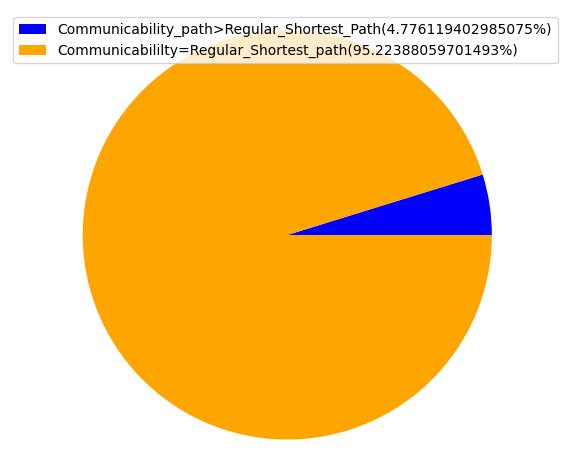

In [45]:
source_node = 1  
#-------------------------------------------------------------------------------------------------------
#This code below is generating the communicability shortest distance 
shortest_paths_dijkstra1mod = nx.shortest_path(G11, source=source_node, weight='weight')
#-------------------------------------------------------------------------------------------------------
# We can easily see that by computing the above code the dictionnary keys are not sorted
#---------------------------------dictionary key sorting attempts--------------------------------------------------------------------
Cpqmod=list( shortest_paths_dijkstra1mod.keys() )
Cpqmod.sort()
# print(Cpq)
Sorted_Cpqmod={i:shortest_paths_dijkstra1mod[i] for i in Cpqmod} # 
print(Sorted_Cpqmod)
#-------------------------------------------------------------------------------------------------------
shortest_paths_dijkstra2mod = nx.shortest_path(Gmod, source=source_node, weight='weight')
Dpqmod=list( shortest_paths_dijkstra2mod.keys() )
Dpqmod.sort()
# print(Dpq)
Sorted_Dpqmod={i:shortest_paths_dijkstra2mod[i] for i in Dpqmod}
# print(Sorted_Dpq)

len(Sorted_Cpqmod)==len(Sorted_Dpqmod)
A1mod=Sorted_Cpqmod.keys()
# print(A1)
A2mod=Sorted_Dpq.keys()
# print(A2)
A1mod==A2mod
A1mod_values=Sorted_Cpqmod.values()#

A2mod_values=Sorted_Dpqmod.values() #shortest communicability path 
# print(list(A2_values))


A22mod=[len(i) for i in list(A2mod_values)]
A11mod=[len(i) for i in list(A1mod_values)] # It is the list of the paths lengths in Cpq_values ie associated to a given node
# print(len(A11))

indxmod=[]
for i in range(len(A11mod)):
    if A11mod[i]!=A22mod[i] :
        indxmod.append(i)
print(len(indxmod))
compmod=[]
CpqA11mod=[] #
DpqA22mod=[]
#creating now list that stores values when com_SP>Regularshortest(or else) and when they are equal
Cpq_greatmod=[]
Cpq_eq_Spmod=[]
for i in indxmod :
    CpqA11mod.append(A11mod[i])# communicability distance for the indices where Cpq differ from Dpq 
    DpqA22mod.append(A22mod[i])# regular shortest path the indices where Cpq differ from Dpq
    compmod.append((A11mod[i],A22mod[i]))
print(len(DpqA22mod))
# print(comp)
#creating now list that stores values when com_SP>Regularshortest(or else) and when they are equal
Cpq_greatmod=[]
Spq_greatmod=[]
Cpq_eq_Spmod=[]
for i in range(len(A11mod)):
    if A11mod[i]>A22mod[i]:
        Cpq_greatmod.append(A11mod[i])
    elif A11mod[i]<A22mod[i]:
        Spq_greatmod.append(A22mod[i])
    else :
        Cpq_eq_Spmod.append(A11mod[i])
print( len(Cpq_greatmod),len(Cpq_eq_Spmod) )

# The slices will be ordered and plotted counter-clockwise.
P1mod=(len(Cpq_greatmod)/len(A11mod))*100
P2mod=(len(Cpq_eq_Spmod)/len(A11mod))*100
labels = [f'Communicability_path>Regular_Shortest_Path({P1mod}%)', f'Communicabililty=Regular_Shortest_path({P2mod}%)']
sizes = [P1mod,P2mod]
colors = ['blue', 'orange']
patches, texts = plt.pie(sizes, colors=colors, startangle=0)
plt.legend(patches, labels,loc='best')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.savefig(f"{pic}Rewired-Shorest-path-comparison-chart.png")
plt.show()

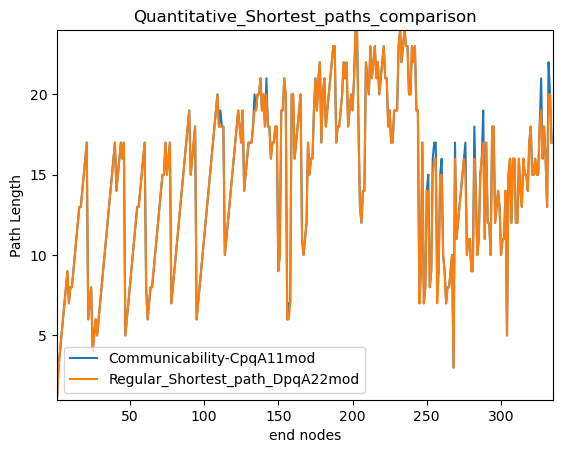

In [46]:
plt.plot(range(len(A11mod)), A11mod, label = "Communicability-CpqA11mod")
plt.plot(range(len(A11mod)), A22mod, label = "Regular_Shortest_path_DpqA22mod")
plt.xlim(1,len(A11mod))
plt.ylim(1,max(A11mod))
plt.xlabel('end nodes')
plt.ylabel('Path Length')
plt.title('Quantitative_Shortest_paths_comparison')
plt.legend()
plt.savefig(f"{pic}rewired-Quantitative_Shorest_paths_comparison_Plot.png")
plt.show()
# A11